# Sanji Model 
<font color=#FF0000>**To re run for results if needed**</font>
<font color=#F0FF0F>**This is a copy of Model BlackLeg Updated**</font>

In [1]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
from sklearn.metrics import roc_curve, auc

In [2]:
import keras 
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, metrics, regularizers
from keras.models import Model, load_model, clone_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Abnormalities

In [3]:
abnor = {'AF': 164890007, 'AFIB': 164889003,'SB': 426177001,'SR': 426783006 ,'ST': 427084000,'SVT':426761007}

classi = [164890007,164889003,426177001,426783006,427084000,426761007]
class_d = {164890007:0, 164889003:1, 426177001:2, 426783006:3, 427084000:4, 426761007:5}

# Load the data 

In [4]:
path = 'D:/final year project/12345/Chapman_Train_Val_Test/'
x_train = np.load(path+'x_train1.npy')
x_test = np.load(path+'x_test.npy')
y_train = np.load(path+'y_train1.npy')
y_test = np.load(path+'y_test.npy')
x_val = np.load(path+'x_val.npy')
y_val = np.load(path+'y_val.npy')

In [5]:
path = 'D:/final year project/12345/Chapman_Train_Val_Test/'

l0_x_train = np.load(path+'l0_x_train1.npy')
l0_x_test = np.load(path+'l0_x_test.npy')
l0_y_train = np.load(path+'l0_y_train1.npy')
l0_y_test = np.load(path+'l0_y_test.npy')
l0_x_val =  np.load(path+'l0_x_val.npy')
l0_y_val = np.load(path+'l0_y_val.npy')


l1_x_train = np.load(path+'l1_x_train1.npy')
l1_x_test = np.load(path+'l1_x_test.npy')
l1_y_train = np.load(path+'l1_y_train1.npy')
l1_y_test = np.load(path+'l1_y_test.npy')
l1_x_val =  np.load(path+'l1_x_val.npy')
l1_y_val = np.load(path+'l1_y_val.npy')

l2_x_train = np.load(path+'l2_x_train1.npy')
l2_x_test = np.load(path+'l2_x_test.npy')
l2_y_train = np.load(path+'l2_y_train1.npy')
l2_y_test = np.load(path+'l2_y_test.npy')
l2_x_val =  np.load(path+'l2_x_val.npy')
l2_y_val = np.load(path+'l2_y_val.npy')

l3_x_train = np.load(path+'l3_x_train1.npy')
l3_x_test = np.load(path+'l3_x_test.npy')
l3_y_train = np.load(path+'l3_y_train1.npy')
l3_y_test = np.load(path+'l3_y_test.npy')
l3_x_val =  np.load(path+'l3_x_val.npy')
l3_y_val = np.load(path+'l3_y_val.npy')

l4_x_train = np.load(path+'l4_x_train1.npy')
l4_x_test = np.load(path+'l4_x_test.npy')
l4_y_train = np.load(path+'l4_y_train1.npy')
l4_y_test = np.load(path+'l4_y_test.npy')
l4_x_val =  np.load(path+'l4_x_val.npy')
l4_y_val = np.load(path+'l4_y_val.npy')

l5_x_train = np.load(path+'l5_x_train1.npy')
l5_x_test = np.load(path+'l5_x_test.npy')
l5_y_train = np.load(path+'l5_y_train1.npy')
l5_y_test = np.load(path+'l5_y_test.npy')
l5_x_val =  np.load(path+'l5_x_val.npy')
l5_y_val = np.load(path+'l5_y_val.npy')

l6_x_train = np.load(path+'l6_x_train1.npy')
l6_x_test = np.load(path+'l6_x_test.npy')
l6_y_train = np.load(path+'l6_y_train1.npy')
l6_y_test = np.load(path+'l6_y_test.npy')
l6_x_val =  np.load(path+'l6_x_val.npy')
l6_y_val = np.load(path+'l6_y_val.npy')

l7_x_train = np.load(path+'l7_x_train1.npy')
l7_x_test = np.load(path+'l7_x_test.npy')
l7_y_train = np.load(path+'l7_y_train1.npy')
l7_y_test = np.load(path+'l7_y_test.npy')
l7_x_val =  np.load(path+'l7_x_val.npy')
l7_y_val = np.load(path+'l7_y_val.npy')

l8_x_train = np.load(path+'l8_x_train1.npy')
l8_x_test = np.load(path+'l8_x_test.npy')
l8_y_train = np.load(path+'l8_y_train1.npy')
l8_y_test = np.load(path+'l8_y_test.npy')
l8_x_val =  np.load(path+'l8_x_val.npy')
l8_y_val = np.load(path+'l8_y_val.npy')

l9_x_train = np.load(path+'l9_x_train1.npy')
l9_x_test = np.load(path+'l9_x_test.npy')
l9_y_train = np.load(path+'l9_y_train1.npy')
l9_y_test = np.load(path+'l9_y_test.npy')
l9_x_val =  np.load(path+'l9_x_val.npy')
l9_y_val = np.load(path+'l9_y_val.npy')

l10_x_train = np.load(path+'l10_x_train1.npy')
l10_x_test = np.load(path+'l10_x_test.npy')
l10_y_train = np.load(path+'l10_y_train1.npy')
l10_y_test = np.load(path+'l10_y_test.npy')
l10_x_val =  np.load(path+'l10_x_val.npy')
l10_y_val = np.load(path+'l10_y_val.npy')

l11_x_train = np.load(path+'l11_x_train1.npy')
l11_x_test = np.load(path+'l11_x_test.npy')
l11_y_train = np.load(path+'l11_y_train1.npy')
l11_y_test = np.load(path+'l11_y_test.npy')
l11_x_val =  np.load(path+'l11_x_val.npy')
l11_y_val = np.load(path+'l11_y_val.npy')

In [6]:
def group(y):
    r = []
    for i in y:
        if i==0 or i==1:
            r.append(0)
        elif i==2:
            r.append(1)
        elif i==3:
            r.append(2)
        else:
            r.append(3)
    return r

In [7]:
y_train = np.array(group(y_train))
y_test = np.array(group(y_test))
y_val = np.array(group(y_val))

l0_y_train = np.array(group(l0_y_train))
l0_y_test = np.array(group(l0_y_test ))
l0_y_val = np.array(group(l0_y_val ))

l1_y_train =np.array(group(l1_y_train))
l1_y_test = np.array(group(l1_y_test))
l1_y_val = np.array(group(l1_y_val))

l2_y_train = np.array(group(l2_y_train))
l2_y_test =np.array(group(l2_y_test))
l2_y_val = np.array(group(l2_y_val))

l3_y_train = np.array(group(l3_y_train))
l3_y_test = np.array(group(l3_y_test))
l3_y_val = np.array(group(l3_y_val))

l4_y_train = np.array(group(l4_y_train))
l4_y_test = np.array(group(l4_y_test))
l4_y_val = np.array(group(l4_y_val))

l5_y_train = np.array(group(l5_y_train))
l5_y_test= np.array(group(l5_y_test))
l5_y_val = np.array(group(l5_y_val))

l6_y_train = np.array(group(l6_y_train))
l6_y_test = np.array(group(l6_y_test))
l6_y_val = np.array(group(l6_y_val))

l7_y_train = np.array(group(l7_y_train))
l7_y_test =np.array(group(l7_y_test))
l7_y_val = np.array(group(l7_y_val))

l8_y_train = np.array(group(l8_y_train))
l8_y_test = np.array(group(l8_y_test))
l8_y_val = np.array(group(l8_y_val))

l9_y_train = np.array(group(l9_y_train))
l9_y_test = np.array(group(l9_y_test))
l9_y_val = np.array(group(l9_y_val))

l10_y_train = np.array(group(l10_y_train))
l10_y_test =np.array(group(l10_y_test))
l10_y_val = np.array(group(l10_y_val))

l11_y_train = np.array(group(l11_y_train))
l11_y_test = np.array(group(l11_y_test))
l11_y_val = np.array(group(l11_y_val))

In [8]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_val = y_val.flatten()
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_val = y_val.astype(int)

l0_y_train = l0_y_train.flatten()
l0_y_test = l0_y_test.flatten()
l0_y_val = l0_y_val.flatten()
l0_y_train= l0_y_train.astype(int)
l0_y_test = l0_y_test.astype(int)
l0_y_val = l0_y_val.astype(int)


l1_y_train = l1_y_train.flatten()
l1_y_test = l1_y_test.flatten()
l1_y_val = l1_y_val.flatten()
l1_y_train = l1_y_train.astype(int)
l1_y_test = l1_y_test.astype(int)
l1_y_val = l1_y_val.astype(int)


l2_y_train = l2_y_train.flatten()
l2_y_test = l2_y_test.flatten()
l2_y_val = l2_y_val.flatten()
l2_y_train = l2_y_train.astype(int)
l2_y_test = l2_y_test.astype(int)
l2_y_val = l2_y_val.astype(int)

l3_y_train = l3_y_train.flatten()
l3_y_test = l3_y_test.flatten()
l3_y_val = l3_y_val.flatten()
l3_y_train = l3_y_train.astype(int)
l3_y_test = l3_y_test.astype(int)
l3_y_val = l3_y_val.astype(int)

l4_y_train = l4_y_train.flatten()
l4_y_test = l4_y_test.flatten()
l4_y_val = l4_y_val.flatten()
l4_y_train = l4_y_train.astype(int)
l4_y_test = l4_y_test.astype(int)
l4_y_val = l4_y_val.astype(int)

l5_y_train = l5_y_train.flatten()
l5_y_test = l5_y_test.flatten()
l5_y_val = l5_y_val.flatten()
l5_y_train= l5_y_train.astype(int)
l5_y_test = l5_y_test.astype(int)
l5_y_val = l5_y_val.astype(int)

l6_y_train = l6_y_train.flatten()
l6_y_test = l6_y_test.flatten()
l6_y_val = l6_y_val.flatten()
l6_y_train= l6_y_train.astype(int)
l6_y_test = l6_y_test.astype(int)
l6_y_val = l6_y_val.astype(int)

l7_y_train = l7_y_train.flatten()
l7_y_test = l7_y_test.flatten()
l7_y_val = l7_y_val.flatten()
l7_y_train= l7_y_train.astype(int)
l7_y_test = l7_y_test.astype(int)
l7_y_val = l7_y_val.astype(int)

l8_y_train = l8_y_train.flatten()
l8_y_test = l8_y_test.flatten()
l8_y_val = l8_y_val.flatten()
l8_y_train= l8_y_train.astype(int)
l8_y_test = l8_y_test.astype(int)
l8_y_val = l8_y_val.astype(int)

l9_y_train = l9_y_train.flatten()
l9_y_test = l9_y_test.flatten()
l9_y_val = l9_y_val.flatten()
l9_y_train = l9_y_train.astype(int)
l9_y_test = l9_y_test.astype(int)
l9_y_val = l9_y_val.astype(int)

l10_y_train = l10_y_train.flatten()
l10_y_test = l10_y_test.flatten()
l10_y_val = l10_y_val.flatten()
l10_y_train = l10_y_train.astype(int)
l10_y_test = l10_y_test.astype(int)
l10_y_val = l10_y_val.astype(int)

l11_y_train = l11_y_train.flatten()
l11_y_test = l11_y_test.flatten()
l11_y_val = l11_y_val.flatten()
l11_y_train= l11_y_train.astype(int)
l11_y_test = l11_y_test.astype(int)
l11_y_val = l11_y_val.astype(int)


In [9]:
x_train = x_train.reshape(7026,5000,12)
x_test = x_test.reshape(2019,5000,12)
x_val = x_val.reshape(1050,5000,12)
y_train = y_train.reshape(7026,1)
y_test = y_test.reshape(2019,1)
y_val = y_val.reshape(1050,1)

l0_x_train = l0_x_train.reshape(7026,5000,1)
l0_x_test = l0_x_test.reshape(2019,5000,1)
l0_y_train = l0_y_train.reshape(7026,1)
l0_y_test = l0_y_test.reshape(2019,1)
l0_x_val = l0_x_val.reshape(1050,5000,1)
l0_y_val = l0_y_val.reshape(1050,1)

l1_x_train = l1_x_train.reshape(7026,5000,1)
l1_x_test = l1_x_test.reshape(2019,5000,1)
l1_y_train = l1_y_train.reshape(7026,1)
l1_y_test = l1_y_test.reshape(2019,1)
l1_x_val = l1_x_val.reshape(1050,5000,1)
l1_y_val = l1_y_val.reshape(1050,1)

l2_x_train = l2_x_train.reshape(7026,5000,1)
l2_x_test = l2_x_test.reshape(2019,5000,1)
l2_y_train = l2_y_train.reshape(7026,1)
l2_y_test = l2_y_test.reshape(2019,1)
l2_x_val = l2_x_val.reshape(1050,5000,1)
l2_y_val = l2_y_val.reshape(1050,1)

l3_x_train = l3_x_train.reshape(7026,5000,1)
l3_x_test = l3_x_test.reshape(2019,5000,1)
l3_y_train = l3_y_train.reshape(7026,1)
l3_y_test = l3_y_test.reshape(2019,1)
l3_x_val = l3_x_val.reshape(1050,5000,1)
l3_y_val = l3_y_val.reshape(1050,1)

l4_x_train = l4_x_train.reshape(7026,5000,1)
l4_x_test = l4_x_test.reshape(2019,5000,1)
l4_y_train = l4_y_train.reshape(7026,1)
l4_y_test = l4_y_test.reshape(2019,1)
l4_x_val = l4_x_val.reshape(1050,5000,1)
l4_y_val = l4_y_val.reshape(1050,1)

l5_x_train = l5_x_train.reshape(7026,5000,1)
l5_x_test = l5_x_test.reshape(2019,5000,1)
l5_y_train = l5_y_train.reshape(7026,1)
l5_y_test = l5_y_test.reshape(2019,1)
l5_x_val = l5_x_val.reshape(1050,5000,1)
l5_y_val = l5_y_val.reshape(1050,1)

l6_x_train = l6_x_train.reshape(7026,5000,1)
l6_x_test = l6_x_test.reshape(2019,5000,1)
l6_y_train = l6_y_train.reshape(7026,1)
l6_y_test = l6_y_test.reshape(2019,1)
l6_x_val = l6_x_val.reshape(1050,5000,1)
l6_y_val = l6_y_val.reshape(1050,1)

l7_x_train = l7_x_train.reshape(7026,5000,1)
l7_x_test = l7_x_test.reshape(2019,5000,1)
l7_y_train = l7_y_train.reshape(7026,1)
l7_y_test = l7_y_test.reshape(2019,1)
l7_x_val = l7_x_val.reshape(1050,5000,1)
l7_y_val = l7_y_val.reshape(1050,1)

l8_x_train = l8_x_train.reshape(7026,5000,1)
l8_x_test = l8_x_test.reshape(2019,5000,1)
l8_y_train = l8_y_train.reshape(7026,1)
l8_y_test = l8_y_test.reshape(2019,1)
l8_x_val = l8_x_val.reshape(1050,5000,1)
l8_y_val = l8_y_val.reshape(1050,1)

l9_x_train = l9_x_train.reshape(7026,5000,1)
l9_x_test = l9_x_test.reshape(2019,5000,1)
l9_y_train = l9_y_train.reshape(7026,1)
l9_y_test = l9_y_test.reshape(2019,1)
l9_x_val = l9_x_val.reshape(1050,5000,1)
l9_y_val = l9_y_val.reshape(1050,1)

l10_x_train = l10_x_train.reshape(7026,5000,1)
l10_x_test = l10_x_test.reshape(2019,5000,1)
l10_y_train = l10_y_train.reshape(7026,1)
l10_y_test = l10_y_test.reshape(2019,1)
l10_x_val = l10_x_val.reshape(1050,5000,1)
l10_y_val = l10_y_val.reshape(1050,1)

l11_x_train = l11_x_train.reshape(7026,5000,1)
l11_x_test = l11_x_test.reshape(2019,5000,1)
l11_y_train = l11_y_train.reshape(7026,1)
l11_y_test = l11_y_test.reshape(2019,1)
l11_x_val = l11_x_val.reshape(1050,5000,1)
l11_y_val = l11_y_val.reshape(1050,1)


# Distiller

In [10]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(self,optimizer,metrics,student_loss_fn,distillation_loss_fn,alpha=0.1,temperature=3):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x,y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x[0], training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x[1], training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y[1], student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y[1], student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x,y = data
        # Compute predictions
        y_prediction = self.student(x[1], training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y[1], y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y[1], y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

# Teacher Model
<font color=#FF0000>**Model Sanji**</font>

In [11]:
teacher_23 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,12)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1,activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(3)),
    keras.layers.Dropout(0.2),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512,activation= 'relu'),  
    keras.layers.Dense(units=256,activation= 'relu'),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = 'teacher_joyboy',
)
teacher_23.build()

teacher_23.summary()

Model: "teacher_joyboy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4998, 32)          1184      
                                                                 
 conv1d_1 (Conv1D)           (None, 4996, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1665, 32)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 1663, 64)          6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 1661, 64)          12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 553, 64)          0         
 1D)                                                

In [12]:
opti = keras.optimizers.Adam(learning_rate=0.001)
teacher_23.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 20

history = teacher_23.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/20
440/440 [==============================] - 236s 475ms/step - loss: 0.9061 - accuracy: 0.6073 - val_loss: 0.6755 - val_accuracy: 0.7771
Epoch 2/20
440/440 [==============================] - 209s 474ms/step - loss: 0.3526 - accuracy: 0.8816 - val_loss: 0.3577 - val_accuracy: 0.8810
Epoch 3/20
440/440 [==============================] - 219s 498ms/step - loss: 0.2748 - accuracy: 0.9162 - val_loss: 0.2513 - val_accuracy: 0.9257
Epoch 4/20
440/440 [==============================] - 184s 418ms/step - loss: 0.2319 - accuracy: 0.9291 - val_loss: 0.2327 - val_accuracy: 0.9181
Epoch 5/20
440/440 [==============================] - 168s 381ms/step - loss: 0.2120 - accuracy: 0.9367 - val_loss: 0.2274 - val_accuracy: 0.9229
Epoch 6/20
440/440 [==============================] - 154s 350ms/step - loss: 0.2068 - accuracy: 0.9360 - val_loss: 0.2014 - val_accuracy: 0.9352
Epoch 7/20
440/440 [==============================] - 151s 344ms/step - loss: 0.1947 - accuracy: 0.9377 - val_loss: 0.2208 -

In [13]:
teacher_23.evaluate(x_test, y_test)

64/64 [==============================] - 10s 146ms/step - loss: 0.1497 - accuracy: 0.9520


[0.14967453479766846, 0.9519563913345337]

Text(0, 0.5, 'Accuracy')

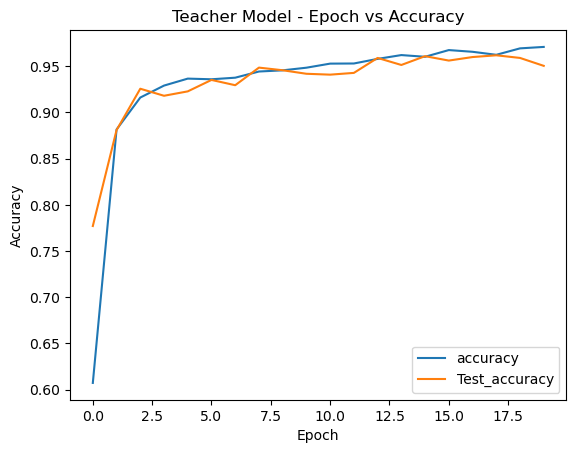

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Teacher Model - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

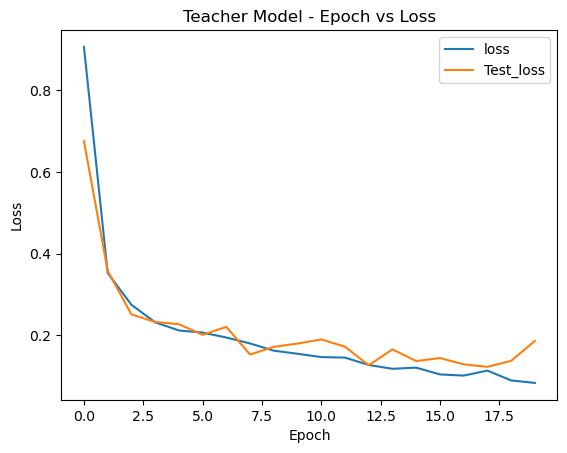

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Teacher Model - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [16]:
predictions = teacher_23.predict(x_test)
     

pred = np.argmax(predictions,axis=1)
# label
# y_test = np.argmax(y_test,axis=1)
     

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

64/64 [==============================] - 12s 126ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       447
           1       0.98      1.00      0.99       769
           2       0.92      0.96      0.94       374
           3       0.94      0.89      0.91       429

    accuracy                           0.95      2019
   macro avg       0.95      0.94      0.94      2019
weighted avg       0.95      0.95      0.95      2019



In [17]:
y_predicted =teacher_23.predict(x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)

64/64 [==============================] - 10s 152ms/step


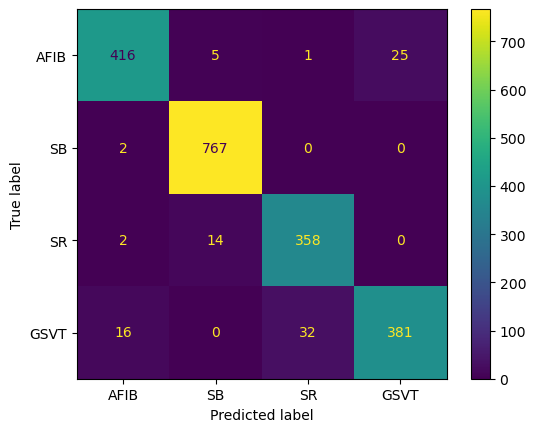

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

# Student Models
<font color=#FF0000>**Leads 1 to 12**</font>

In [19]:
stu_4 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_4.build()

stu_4.summary()


Model: "0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 2499, 32)         0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1248, 64)         0         
 1D)                                                             
                                                                 
 conv1d_12 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 623, 128)         0         

In [ ]:
stu_0 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_0.build()

stu_0.summary()


In [20]:
stu_1 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_1.build()

stu_1.summary()


Model: "0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 623, 128)         0         

In [28]:
stu_2 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_2.build()

stu_2.summary()


Model: "0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_27 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 623, 128)         0         

In [ ]:
stu_3 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_3.build()

stu_3.summary()


In [21]:
stu_5 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_5.build()

stu_5.summary()


Model: "0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 4998, 32)          128       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 2499, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 2497, 64)          6208      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 1248, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 1246, 128)         24704     
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 623, 128)         0         

In [ ]:
stu_6 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_6.build()

stu_6.summary()


In [ ]:
stu_7 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_7.build()

stu_7.summary()


In [ ]:
stu_8 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_8.build()

stu_8.summary()


In [ ]:
stu_9 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_9.build()

stu_9.summary()


In [ ]:
stu_10 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_10.build()

stu_10.summary()


In [ ]:
stu_11 = keras.models.Sequential([
    keras.layers.Input(shape=(5000,1)),
    keras.layers.Conv1D(filters=32, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=64, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=128, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=256, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=512, kernel_size=3,strides=1, activation= 'relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation= 'relu'),
    keras.layers.Dense(units=64,activation= 'relu'),
    keras.layers.Dense(units=4,activation='softmax')
],
    name = '0',
)
stu_11.build()

stu_11.summary()


# Training
<font color=#FF0000>**Student Models 1 to 12**</font>

In [39]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_0.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist0 = stu_0.fit(l0_x_train, l0_y_train,validation_data=(l0_x_val,l0_y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 134s 302ms/step - loss: 1.1403 - accuracy: 0.4936 - val_loss: 0.9170 - val_accuracy: 0.6019
Epoch 2/10
440/440 [==============================] - 134s 306ms/step - loss: 0.8559 - accuracy: 0.6314 - val_loss: 0.7248 - val_accuracy: 0.7038
Epoch 3/10
440/440 [==============================] - 134s 305ms/step - loss: 0.7210 - accuracy: 0.7050 - val_loss: 0.6673 - val_accuracy: 0.7181
Epoch 4/10
440/440 [==============================] - 133s 303ms/step - loss: 0.5311 - accuracy: 0.7878 - val_loss: 0.4393 - val_accuracy: 0.8267
Epoch 5/10
440/440 [==============================] - 129s 293ms/step - loss: 0.4517 - accuracy: 0.8194 - val_loss: 0.4336 - val_accuracy: 0.8362
Epoch 6/10
440/440 [==============================] - 129s 294ms/step - loss: 0.4151 - accuracy: 0.8323 - val_loss: 0.3776 - val_accuracy: 0.8524
Epoch 7/10
440/440 [==============================] - 130s 297ms/step - loss: 0.3839 - accuracy: 0.8430 - val_loss: 0.3407 -

In [41]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_1.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist1 = stu_1.fit(l1_x_train, l1_y_train,validation_data=(l1_x_val,l1_y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 141s 318ms/step - loss: 0.8192 - accuracy: 0.6567 - val_loss: 0.8145 - val_accuracy: 0.6771
Epoch 2/10
440/440 [==============================] - 136s 308ms/step - loss: 0.6640 - accuracy: 0.7404 - val_loss: 0.5589 - val_accuracy: 0.7810
Epoch 3/10
440/440 [==============================] - 132s 300ms/step - loss: 0.5521 - accuracy: 0.7847 - val_loss: 0.5015 - val_accuracy: 0.7952
Epoch 4/10
440/440 [==============================] - 133s 302ms/step - loss: 0.4791 - accuracy: 0.8120 - val_loss: 0.4232 - val_accuracy: 0.8352
Epoch 5/10
440/440 [==============================] - 131s 297ms/step - loss: 0.4556 - accuracy: 0.8244 - val_loss: 0.4649 - val_accuracy: 0.8362
Epoch 6/10
440/440 [==============================] - 132s 301ms/step - loss: 0.4161 - accuracy: 0.8409 - val_loss: 0.3789 - val_accuracy: 0.8562
Epoch 7/10
440/440 [==============================] - 131s 297ms/step - loss: 0.3961 - accuracy: 0.8496 - val_loss: 0.4669 -

In [29]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_2.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist2 = stu_2.fit(l2_x_train, l2_y_train,validation_data=(l2_x_val,l2_y_val),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 151s 337ms/step - loss: 1.1738 - accuracy: 0.4809 - val_loss: 1.0532 - val_accuracy: 0.5829
Epoch 2/10
440/440 [==============================] - 142s 322ms/step - loss: 0.9859 - accuracy: 0.5710 - val_loss: 0.9758 - val_accuracy: 0.5876
Epoch 3/10
440/440 [==============================] - 143s 324ms/step - loss: 0.9040 - accuracy: 0.6008 - val_loss: 0.8333 - val_accuracy: 0.6381
Epoch 4/10
440/440 [==============================] - 142s 322ms/step - loss: 0.8311 - accuracy: 0.6375 - val_loss: 0.7620 - val_accuracy: 0.6848
Epoch 5/10
440/440 [==============================] - 146s 332ms/step - loss: 0.7816 - accuracy: 0.6711 - val_loss: 0.7387 - val_accuracy: 0.7048
Epoch 6/10
440/440 [==============================] - 142s 322ms/step - loss: 0.7031 - accuracy: 0.7213 - val_loss: 0.9684 - val_accuracy: 0.5981
Epoch 7/10
440/440 [==============================] - 142s 322ms/step - loss: 0.6317 - accuracy: 0.7509 - val_loss: 0.6252 -

In [43]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_3.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist3 = stu_3.fit(l3_x_train, l3_y_train,validation_data=(l3_x_test,l3_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 141s 318ms/step - loss: 1.0544 - accuracy: 0.5370 - val_loss: 0.8441 - val_accuracy: 0.6424
Epoch 2/10
440/440 [==============================] - 137s 311ms/step - loss: 0.8427 - accuracy: 0.6362 - val_loss: 0.7884 - val_accuracy: 0.6736
Epoch 3/10
440/440 [==============================] - 137s 311ms/step - loss: 0.6861 - accuracy: 0.7273 - val_loss: 0.5082 - val_accuracy: 0.8093
Epoch 4/10
440/440 [==============================] - 136s 310ms/step - loss: 0.4855 - accuracy: 0.8074 - val_loss: 0.3904 - val_accuracy: 0.8514
Epoch 5/10
440/440 [==============================] - 138s 314ms/step - loss: 0.4356 - accuracy: 0.8268 - val_loss: 0.3902 - val_accuracy: 0.8435
Epoch 6/10
440/440 [==============================] - 137s 312ms/step - loss: 0.3855 - accuracy: 0.8501 - val_loss: 0.3641 - val_accuracy: 0.8593
Epoch 7/10
440/440 [==============================] - 136s 310ms/step - loss: 0.3635 - accuracy: 0.8564 - val_loss: 0.3394 -

In [66]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_4.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist4 = stu_4.fit(l4_x_train, l4_y_train,validation_data=(l4_x_test,l4_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 148s 334ms/step - loss: 1.1753 - accuracy: 0.4880 - val_loss: 1.0130 - val_accuracy: 0.5567
Epoch 2/10
440/440 [==============================] - 140s 319ms/step - loss: 0.9657 - accuracy: 0.5831 - val_loss: 1.0534 - val_accuracy: 0.5409
Epoch 3/10
440/440 [==============================] - 138s 314ms/step - loss: 0.8364 - accuracy: 0.6336 - val_loss: 0.7853 - val_accuracy: 0.6469
Epoch 4/10
440/440 [==============================] - 136s 310ms/step - loss: 0.7572 - accuracy: 0.6650 - val_loss: 0.7144 - val_accuracy: 0.6761
Epoch 5/10
440/440 [==============================] - 136s 309ms/step - loss: 0.7061 - accuracy: 0.6825 - val_loss: 0.7040 - val_accuracy: 0.6835
Epoch 6/10
440/440 [==============================] - 137s 311ms/step - loss: 0.6844 - accuracy: 0.6892 - val_loss: 0.7450 - val_accuracy: 0.6662
Epoch 7/10
440/440 [==============================] - 136s 310ms/step - loss: 0.6845 - accuracy: 0.6966 - val_loss: 0.7191 -

In [22]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_5.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist5 = stu_5.fit(l5_x_train, l5_y_train,validation_data=(l5_x_test,l5_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 168s 377ms/step - loss: 1.1494 - accuracy: 0.4984 - val_loss: 0.9789 - val_accuracy: 0.5939
Epoch 2/10
440/440 [==============================] - 186s 423ms/step - loss: 0.8911 - accuracy: 0.6186 - val_loss: 0.8295 - val_accuracy: 0.6429
Epoch 3/10
440/440 [==============================] - 187s 425ms/step - loss: 0.7879 - accuracy: 0.6768 - val_loss: 0.6883 - val_accuracy: 0.7340
Epoch 4/10
440/440 [==============================] - 148s 336ms/step - loss: 0.6512 - accuracy: 0.7373 - val_loss: 0.6494 - val_accuracy: 0.7395
Epoch 5/10
440/440 [==============================] - 147s 335ms/step - loss: 0.5918 - accuracy: 0.7711 - val_loss: 0.5455 - val_accuracy: 0.7756
Epoch 6/10
440/440 [==============================] - 146s 332ms/step - loss: 0.5179 - accuracy: 0.8002 - val_loss: 0.5042 - val_accuracy: 0.8044
Epoch 7/10
440/440 [==============================] - 147s 333ms/step - loss: 0.4774 - accuracy: 0.8158 - val_loss: 0.4392 -

In [82]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_6.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist6 = stu_6.fit(l6_x_train, l6_y_train,validation_data=(l6_x_test,l6_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 176s 394ms/step - loss: 1.1046 - accuracy: 0.5130 - val_loss: 0.9259 - val_accuracy: 0.5909
Epoch 2/10
440/440 [==============================] - 170s 386ms/step - loss: 0.8360 - accuracy: 0.6349 - val_loss: 0.6766 - val_accuracy: 0.7127
Epoch 3/10
440/440 [==============================] - 168s 381ms/step - loss: 0.6763 - accuracy: 0.7202 - val_loss: 0.6890 - val_accuracy: 0.7167
Epoch 4/10
440/440 [==============================] - 170s 387ms/step - loss: 0.5524 - accuracy: 0.7748 - val_loss: 0.5392 - val_accuracy: 0.8004
Epoch 5/10
440/440 [==============================] - 170s 387ms/step - loss: 0.4809 - accuracy: 0.8121 - val_loss: 0.4167 - val_accuracy: 0.8400
Epoch 6/10
440/440 [==============================] - 170s 387ms/step - loss: 0.4491 - accuracy: 0.8244 - val_loss: 0.3997 - val_accuracy: 0.8415
Epoch 7/10
440/440 [==============================] - 166s 378ms/step - loss: 0.4346 - accuracy: 0.8298 - val_loss: 0.4586 -

In [83]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_7.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist7 = stu_7.fit(l7_x_train, l7_y_train,validation_data=(l7_x_test,l7_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 175s 391ms/step - loss: 1.0297 - accuracy: 0.5453 - val_loss: 0.8601 - val_accuracy: 0.6112
Epoch 2/10
440/440 [==============================] - 171s 388ms/step - loss: 0.7874 - accuracy: 0.6502 - val_loss: 0.6598 - val_accuracy: 0.7192
Epoch 3/10
440/440 [==============================] - 173s 393ms/step - loss: 0.6732 - accuracy: 0.7171 - val_loss: 0.5888 - val_accuracy: 0.7613
Epoch 4/10
440/440 [==============================] - 171s 388ms/step - loss: 0.6117 - accuracy: 0.7438 - val_loss: 0.5516 - val_accuracy: 0.7845
Epoch 5/10
440/440 [==============================] - 167s 380ms/step - loss: 0.5774 - accuracy: 0.7573 - val_loss: 0.5168 - val_accuracy: 0.7979
Epoch 6/10
440/440 [==============================] - 169s 384ms/step - loss: 0.5381 - accuracy: 0.7753 - val_loss: 0.5573 - val_accuracy: 0.7390
Epoch 7/10
440/440 [==============================] - 169s 385ms/step - loss: 0.5065 - accuracy: 0.7929 - val_loss: 0.4866 -

In [84]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_8.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist8 = stu_8.fit(l8_x_train, l8_y_train,validation_data=(l8_x_test,l8_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 172s 386ms/step - loss: 0.6830 - accuracy: 0.7136 - val_loss: 0.6125 - val_accuracy: 0.7509
Epoch 2/10
440/440 [==============================] - 170s 386ms/step - loss: 0.6186 - accuracy: 0.7394 - val_loss: 0.5947 - val_accuracy: 0.7474
Epoch 3/10
440/440 [==============================] - 179s 408ms/step - loss: 0.5824 - accuracy: 0.7553 - val_loss: 0.5800 - val_accuracy: 0.7573
Epoch 4/10
440/440 [==============================] - 170s 386ms/step - loss: 0.5657 - accuracy: 0.7615 - val_loss: 0.8229 - val_accuracy: 0.6850
Epoch 5/10
440/440 [==============================] - 170s 386ms/step - loss: 0.5503 - accuracy: 0.7642 - val_loss: 0.7248 - val_accuracy: 0.6924
Epoch 6/10
440/440 [==============================] - 169s 385ms/step - loss: 0.5253 - accuracy: 0.7895 - val_loss: 0.5131 - val_accuracy: 0.7900
Epoch 7/10
440/440 [==============================] - 169s 383ms/step - loss: 0.4736 - accuracy: 0.7969 - val_loss: 0.4451 -

In [85]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_9.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist9 = stu_9.fit(l9_x_train, l9_y_train,validation_data=(l9_x_test,l9_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 156s 347ms/step - loss: 1.0480 - accuracy: 0.5364 - val_loss: 0.8521 - val_accuracy: 0.6062
Epoch 2/10
440/440 [==============================] - 139s 316ms/step - loss: 0.7528 - accuracy: 0.6845 - val_loss: 0.6795 - val_accuracy: 0.7211
Epoch 3/10
440/440 [==============================] - 140s 318ms/step - loss: 0.6937 - accuracy: 0.7128 - val_loss: 0.6818 - val_accuracy: 0.7301
Epoch 4/10
440/440 [==============================] - 139s 316ms/step - loss: 0.6263 - accuracy: 0.7377 - val_loss: 0.6655 - val_accuracy: 0.7063
Epoch 5/10
440/440 [==============================] - 139s 316ms/step - loss: 0.5940 - accuracy: 0.7590 - val_loss: 0.5973 - val_accuracy: 0.7370
Epoch 6/10
440/440 [==============================] - 139s 316ms/step - loss: 0.5513 - accuracy: 0.7714 - val_loss: 0.6036 - val_accuracy: 0.7454
Epoch 7/10
440/440 [==============================] - 135s 307ms/step - loss: 0.5301 - accuracy: 0.7821 - val_loss: 0.5072 -

In [86]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_10.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist10 = stu_10.fit(l10_x_train, l10_y_train,validation_data=(l10_x_test,l10_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 141s 318ms/step - loss: 1.0445 - accuracy: 0.5380 - val_loss: 0.7799 - val_accuracy: 0.6790
Epoch 2/10
440/440 [==============================] - 154s 351ms/step - loss: 0.7410 - accuracy: 0.6926 - val_loss: 0.6934 - val_accuracy: 0.6845
Epoch 3/10
440/440 [==============================] - 146s 331ms/step - loss: 0.6722 - accuracy: 0.7179 - val_loss: 0.9071 - val_accuracy: 0.6171
Epoch 4/10
440/440 [==============================] - 138s 313ms/step - loss: 0.6364 - accuracy: 0.7304 - val_loss: 0.5952 - val_accuracy: 0.7345
Epoch 5/10
440/440 [==============================] - 137s 310ms/step - loss: 0.6110 - accuracy: 0.7418 - val_loss: 0.5666 - val_accuracy: 0.7573
Epoch 6/10
440/440 [==============================] - 136s 309ms/step - loss: 0.5698 - accuracy: 0.7548 - val_loss: 0.5717 - val_accuracy: 0.7578
Epoch 7/10
440/440 [==============================] - 133s 302ms/step - loss: 0.5610 - accuracy: 0.7660 - val_loss: 0.5220 -

In [87]:
opti = keras.optimizers.Adam(learning_rate=0.001)
stu_11.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
     

BATCH = 16
EPOCHS = 10

hist11 = stu_11.fit(l11_x_train, l11_y_train,validation_data=(l11_x_test,l11_y_test),epochs=EPOCHS,batch_size=BATCH)

Epoch 1/10
440/440 [==============================] - 136s 308ms/step - loss: 1.0641 - accuracy: 0.5336 - val_loss: 0.8636 - val_accuracy: 0.6365
Epoch 2/10
440/440 [==============================] - 134s 305ms/step - loss: 0.8363 - accuracy: 0.6509 - val_loss: 0.7288 - val_accuracy: 0.6939
Epoch 3/10
440/440 [==============================] - 132s 300ms/step - loss: 0.7254 - accuracy: 0.6963 - val_loss: 0.6672 - val_accuracy: 0.7182
Epoch 4/10
440/440 [==============================] - 136s 308ms/step - loss: 0.6458 - accuracy: 0.7287 - val_loss: 0.6269 - val_accuracy: 0.7494
Epoch 5/10
440/440 [==============================] - 132s 300ms/step - loss: 0.6112 - accuracy: 0.7422 - val_loss: 0.5861 - val_accuracy: 0.7662
Epoch 6/10
440/440 [==============================] - 132s 301ms/step - loss: 0.5887 - accuracy: 0.7596 - val_loss: 0.5181 - val_accuracy: 0.7875
Epoch 7/10
440/440 [==============================] - 133s 302ms/step - loss: 0.5075 - accuracy: 0.7955 - val_loss: 0.5805 -

# Accuracy
<font color=#FF0000>**Training Accuracy**</font>

In [44]:
stu_0.evaluate(l0_x_test, l0_y_test)

64/64 [==============================] - 10s 154ms/step - loss: 0.4506 - accuracy: 0.8252


[0.4505987763404846, 0.8251609802246094]

In [45]:
stu_1.evaluate(l1_x_test, l1_y_test)

64/64 [==============================] - 10s 157ms/step - loss: 0.3213 - accuracy: 0.8772


[0.3213094174861908, 0.8771669268608093]

In [46]:
stu_2.evaluate(l2_x_test, l2_y_test)

64/64 [==============================] - 10s 150ms/step - loss: 0.4158 - accuracy: 0.8450


[0.41579025983810425, 0.8449727296829224]

In [47]:
stu_3.evaluate(l3_x_test, l3_y_test)

64/64 [==============================] - 10s 154ms/step - loss: 0.3175 - accuracy: 0.8668


[0.31748166680336, 0.8667657375335693]

In [68]:
stu_4.evaluate(l4_x_test, l4_y_test)

64/64 [==============================] - 9s 148ms/step - loss: 0.6832 - accuracy: 0.7078


[0.6831851005554199, 0.7077761292457581]

In [26]:
stu_5.evaluate(l5_x_test, l5_y_test)

64/64 [==============================] - 10s 144ms/step - loss: 0.4908 - accuracy: 0.8375


[0.49081870913505554, 0.8375433087348938]

In [88]:
stu_6.evaluate(l6_x_test, l6_y_test)

64/64 [==============================] - 10s 155ms/step - loss: 0.4301 - accuracy: 0.8281


[0.43006592988967896, 0.8281327486038208]

In [89]:
stu_7.evaluate(l7_x_test, l7_y_test)

64/64 [==============================] - 9s 144ms/step - loss: 0.3820 - accuracy: 0.8390


[0.3819722831249237, 0.8390291929244995]

In [90]:
stu_8.evaluate(l8_x_test, l8_y_test)

64/64 [==============================] - 9s 145ms/step - loss: 0.3715 - accuracy: 0.8554


[0.37145090103149414, 0.8553739190101624]

In [91]:
stu_9.evaluate(l9_x_test, l9_y_test)

64/64 [==============================] - 10s 148ms/step - loss: 0.5285 - accuracy: 0.7801


[0.5284633040428162, 0.7800891399383545]

In [92]:
stu_10.evaluate(l10_x_test, l10_y_test)

64/64 [==============================] - 9s 148ms/step - loss: 0.6426 - accuracy: 0.7301


[0.642553448677063, 0.7300643920898438]

In [93]:
stu_11.evaluate(l11_x_test, l11_y_test)

64/64 [==============================] - 9s 148ms/step - loss: 0.3733 - accuracy: 0.8489


[0.3733022212982178, 0.8489351272583008]

# Accuracy Graph
<font color=#FF0000>**1st Graph**</font>

Text(0, 0.5, 'Accuracy')

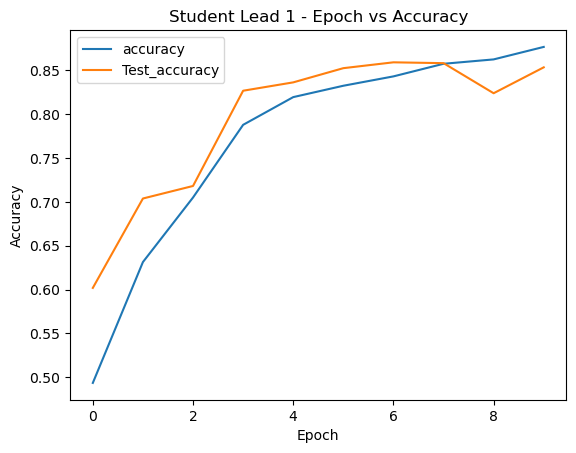

In [48]:
plt.plot(hist0.history['accuracy'])
plt.plot(hist0.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead 1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

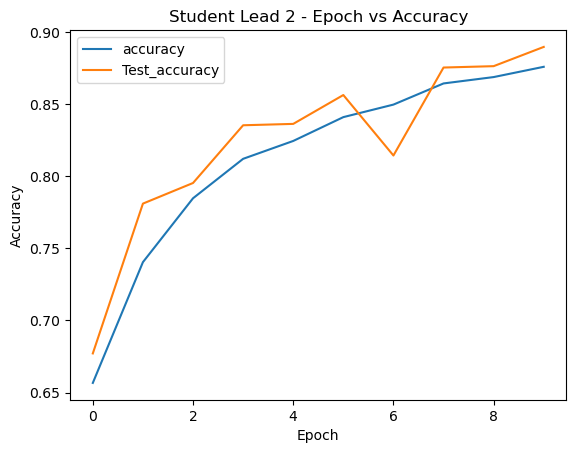

In [49]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead 2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

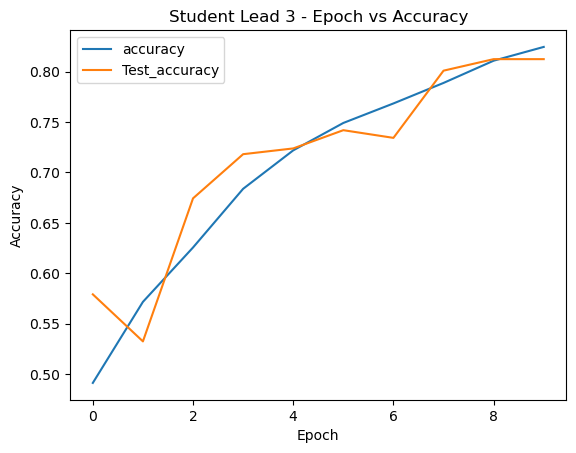

In [50]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead 3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

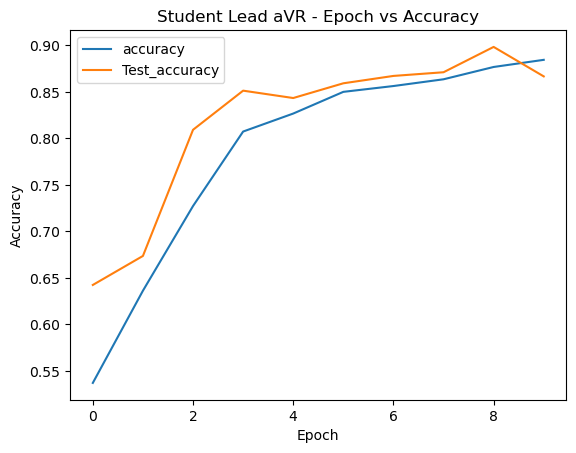

In [51]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead aVR - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

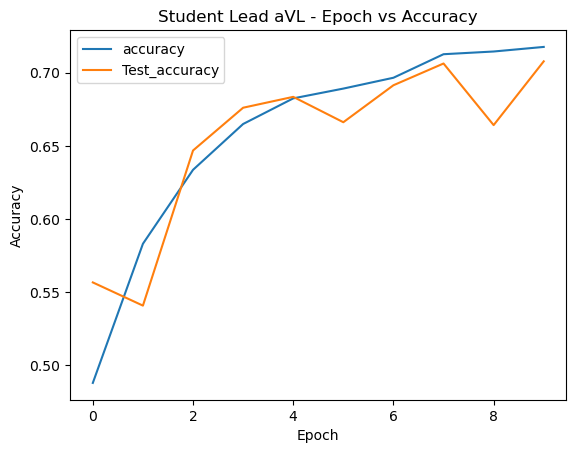

In [70]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead aVL - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

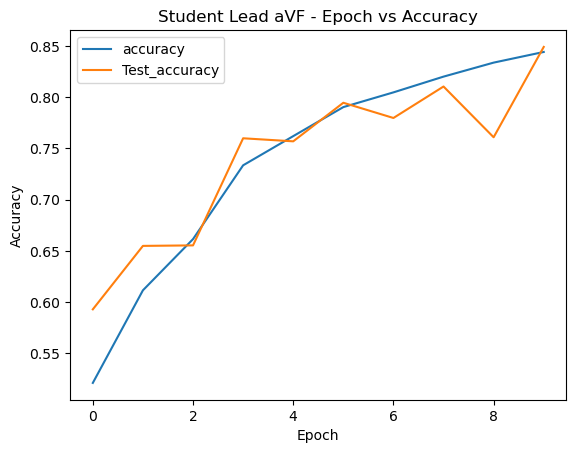

In [71]:

plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead aVF - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

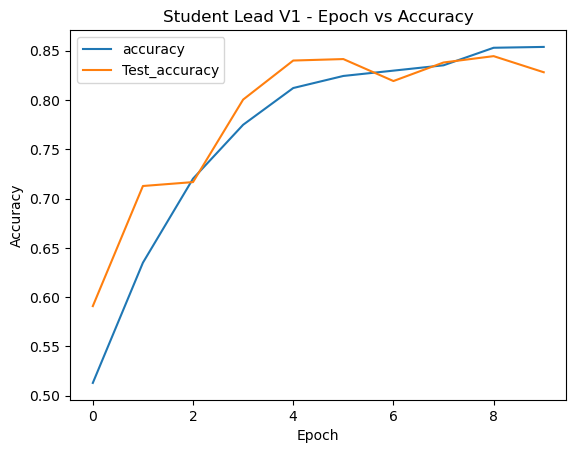

In [94]:
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

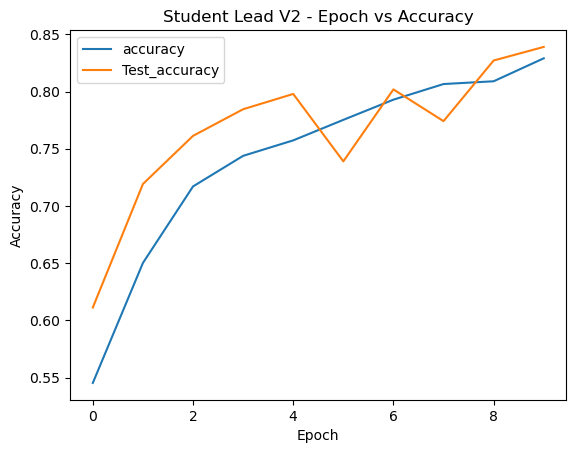

In [95]:
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

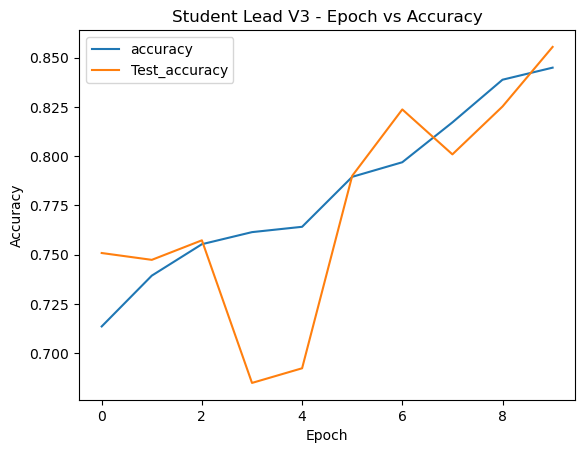

In [96]:
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

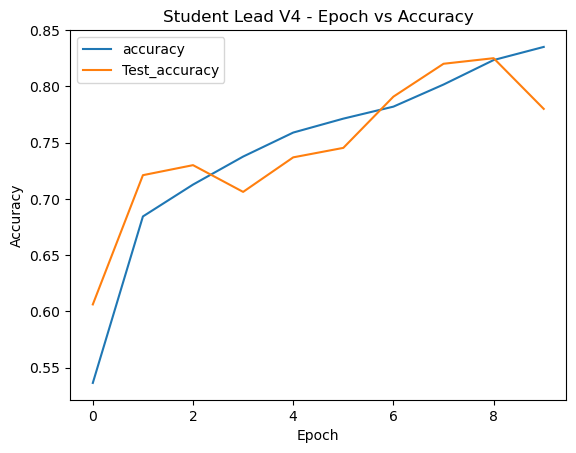

In [97]:
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V4 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

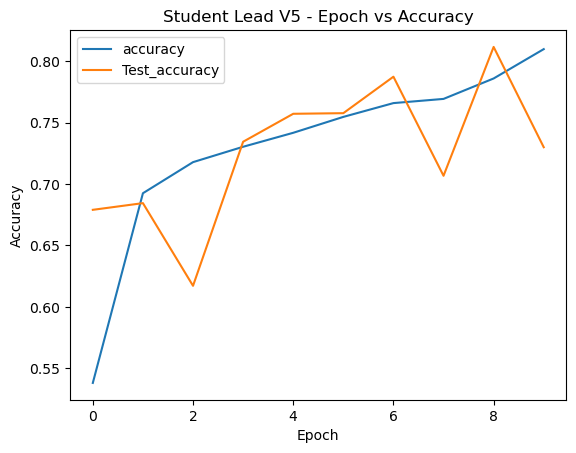

In [98]:
plt.plot(hist10.history['accuracy'])
plt.plot(hist10.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V5 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

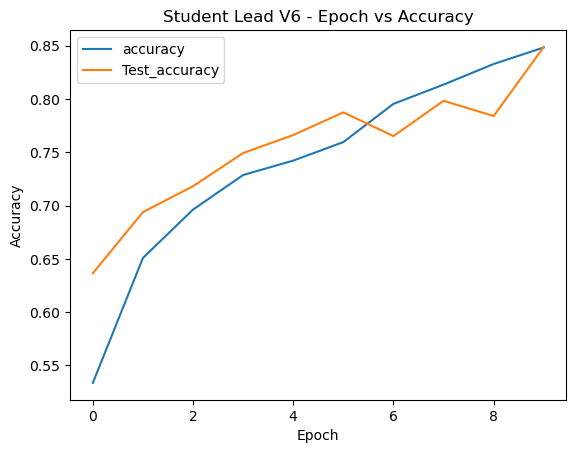

In [99]:
plt.plot(hist11.history['accuracy'])
plt.plot(hist11.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('Student Lead V6 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Loss Graph
<font color=#FF0000>**2nd Graph**</font>

Text(0, 0.5, 'Loss')

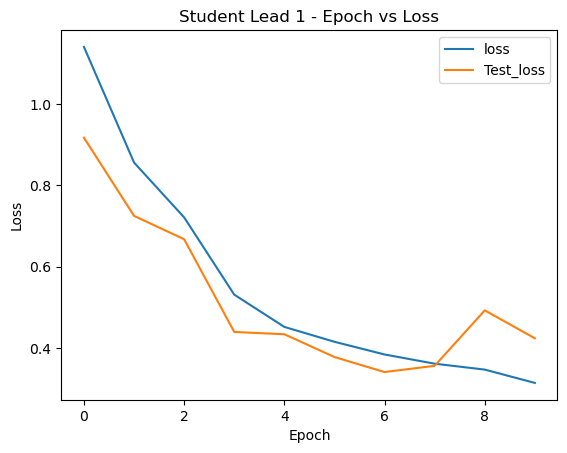

In [52]:
plt.plot(hist0.history['loss'])
plt.plot(hist0.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead 1 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

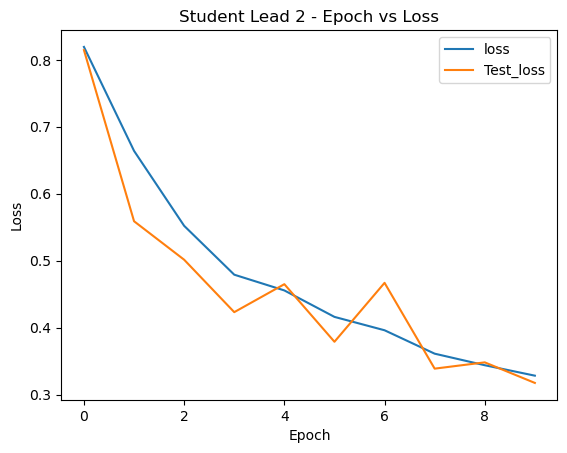

In [53]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead 2 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

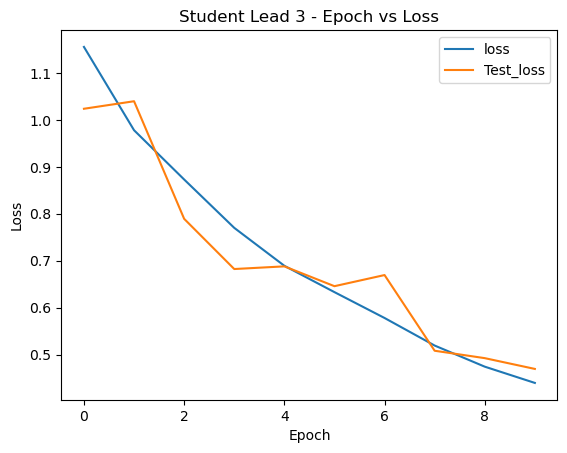

In [54]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead 3 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

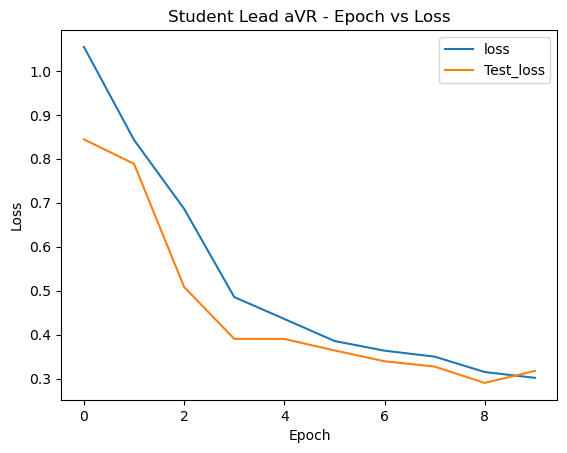

In [55]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead aVR - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

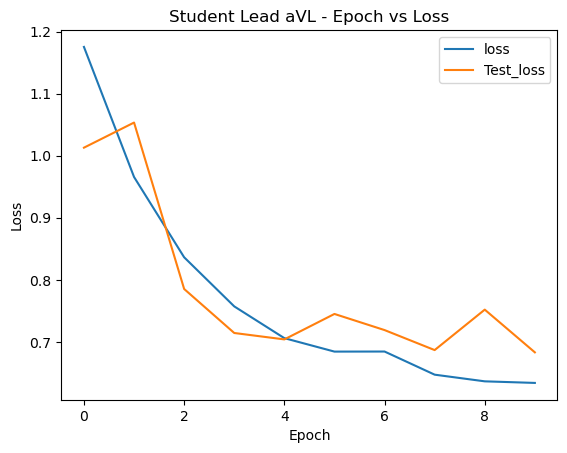

In [72]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead aVL - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

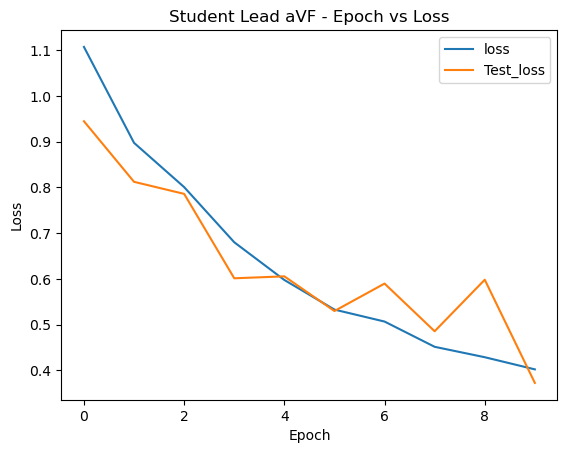

In [73]:
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead aVF - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

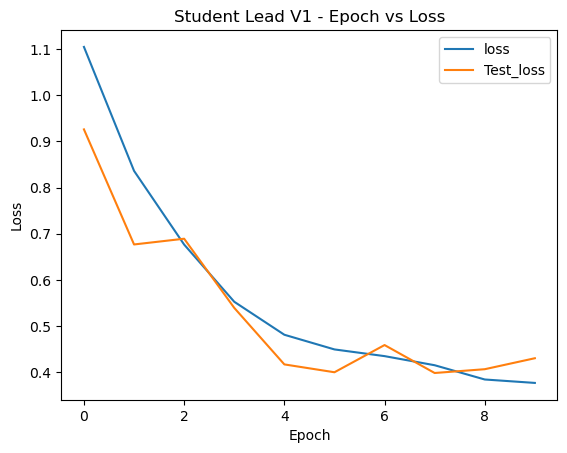

In [100]:
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V1 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

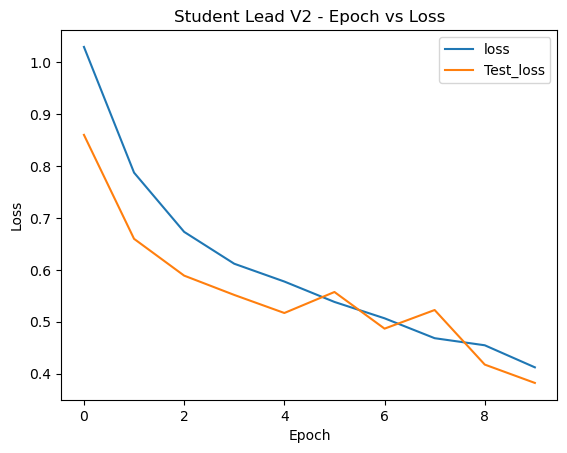

In [101]:
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V2 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

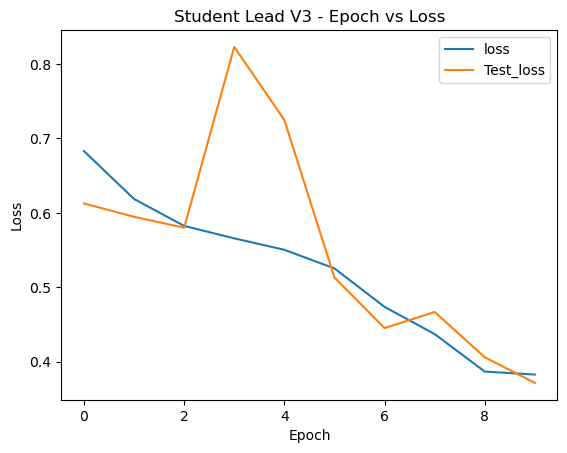

In [102]:
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V3 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

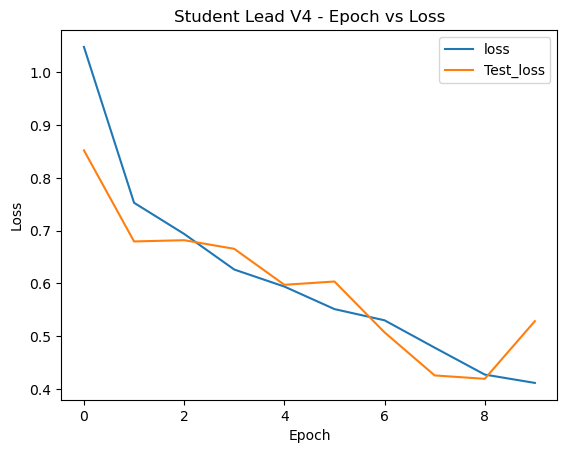

In [103]:
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V4 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

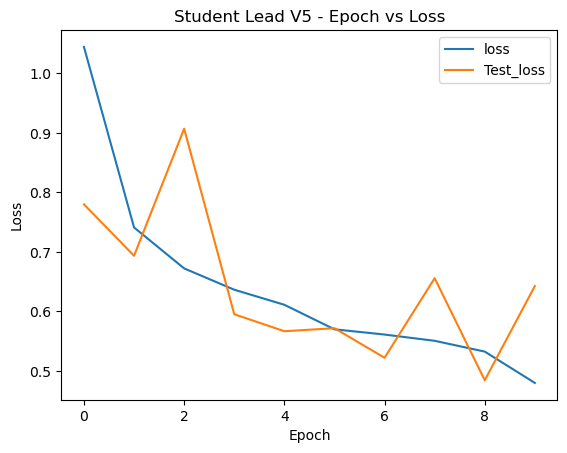

In [104]:
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V5 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

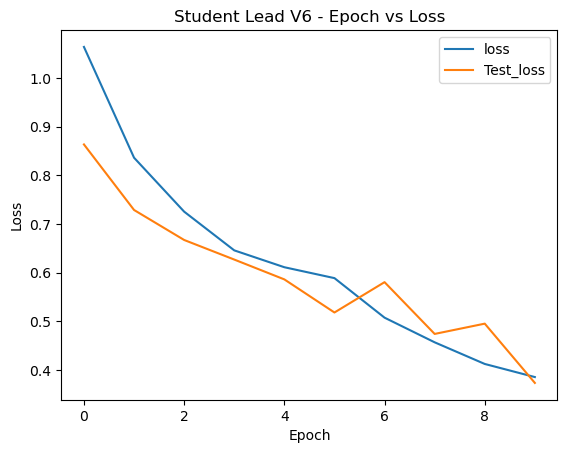

In [105]:
plt.plot(hist11.history['loss'])
plt.plot(hist11.history['val_loss'])
plt.legend(["loss","Test_loss"])
plt.title('Student Lead V6 - Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [56]:
predictions = stu_0.predict(l0_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l0_y_test, pred))

64/64 [==============================] - 10s 159ms/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       447
           1       0.78      0.99      0.88       769
           2       0.85      0.60      0.70       374
           3       0.94      0.75      0.83       429

    accuracy                           0.83      2019
   macro avg       0.85      0.78      0.80      2019
weighted avg       0.84      0.83      0.82      2019



In [57]:
predictions = stu_1.predict(l1_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l1_y_test, pred))

64/64 [==============================] - 10s 159ms/step
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       447
           1       0.89      0.95      0.92       769
           2       0.84      0.78      0.81       374
           3       0.87      0.89      0.88       429

    accuracy                           0.88      2019
   macro avg       0.87      0.86      0.87      2019
weighted avg       0.88      0.88      0.88      2019



In [58]:
predictions = stu_2.predict(l2_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l2_y_test, pred))

64/64 [==============================] - 11s 167ms/step
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       447
           1       0.88      0.93      0.91       769
           2       0.78      0.72      0.75       374
           3       0.83      0.91      0.87       429

    accuracy                           0.84      2019
   macro avg       0.83      0.82      0.83      2019
weighted avg       0.84      0.84      0.84      2019



In [59]:
predictions = stu_3.predict(l3_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l3_y_test, pred))

64/64 [==============================] - 10s 159ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       447
           1       0.94      0.87      0.91       769
           2       0.78      0.83      0.80       374
           3       0.83      0.93      0.88       429

    accuracy                           0.87      2019
   macro avg       0.85      0.86      0.86      2019
weighted avg       0.87      0.87      0.87      2019



In [74]:
predictions = stu_4.predict(l4_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l4_y_test, pred))

64/64 [==============================] - 9s 147ms/step
              precision    recall  f1-score   support

           0       0.56      0.19      0.29       447
           1       0.78      0.99      0.87       769
           2       0.62      0.53      0.57       374
           3       0.67      0.89      0.77       429

    accuracy                           0.71      2019
   macro avg       0.66      0.65      0.62      2019
weighted avg       0.68      0.71      0.67      2019



In [75]:
predictions = stu_5.predict(l5_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l5_y_test, pred))

64/64 [==============================] - 10s 148ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       447
           1       0.87      0.96      0.91       769
           2       0.87      0.63      0.73       374
           3       0.81      0.92      0.86       429

    accuracy                           0.85      2019
   macro avg       0.85      0.82      0.83      2019
weighted avg       0.85      0.85      0.84      2019



In [106]:
predictions = stu_6.predict(l6_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l6_y_test, pred))

64/64 [==============================] - 9s 142ms/step
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       447
           1       0.84      0.99      0.91       769
           2       0.87      0.65      0.75       374
           3       0.73      0.98      0.83       429

    accuracy                           0.83      2019
   macro avg       0.85      0.79      0.80      2019
weighted avg       0.85      0.83      0.82      2019



In [107]:
predictions = stu_7.predict(l7_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l7_y_test, pred))

64/64 [==============================] - 9s 143ms/step
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       447
           1       0.92      0.96      0.94       769
           2       0.87      0.75      0.81       374
           3       0.87      0.71      0.78       429

    accuracy                           0.84      2019
   macro avg       0.84      0.81      0.82      2019
weighted avg       0.85      0.84      0.84      2019



In [108]:
predictions = stu_8.predict(l8_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l8_y_test, pred))

64/64 [==============================] - 10s 146ms/step
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       447
           1       0.88      0.98      0.92       769
           2       0.95      0.69      0.80       374
           3       0.90      0.78      0.83       429

    accuracy                           0.86      2019
   macro avg       0.87      0.83      0.84      2019
weighted avg       0.86      0.86      0.85      2019



In [109]:
predictions = stu_9.predict(l9_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l9_y_test, pred))

64/64 [==============================] - 9s 144ms/step
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       447
           1       0.96      0.76      0.85       769
           2       0.64      0.72      0.67       374
           3       0.74      0.83      0.78       429

    accuracy                           0.78      2019
   macro avg       0.76      0.78      0.77      2019
weighted avg       0.80      0.78      0.78      2019



In [110]:
predictions = stu_10.predict(l10_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l10_y_test, pred))

64/64 [==============================] - 10s 147ms/step
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       447
           1       0.94      0.71      0.81       769
           2       0.53      0.76      0.62       374
           3       0.67      0.93      0.78       429

    accuracy                           0.73      2019
   macro avg       0.73      0.74      0.72      2019
weighted avg       0.77      0.73      0.73      2019



In [111]:
predictions = stu_11.predict(l11_x_test)
     

pred = np.argmax(predictions, axis=1)
# label


from sklearn.metrics import classification_report
print(classification_report(l11_y_test, pred))

64/64 [==============================] - 10s 148ms/step
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       447
           1       0.87      0.99      0.92       769
           2       0.80      0.76      0.78       374
           3       0.88      0.82      0.85       429

    accuracy                           0.85      2019
   macro avg       0.84      0.82      0.83      2019
weighted avg       0.85      0.85      0.85      2019



# Confusion Matrix
<font color=#FF0000>**Leads 1 to 12**</font>

64/64 [==============================] - 10s 163ms/step


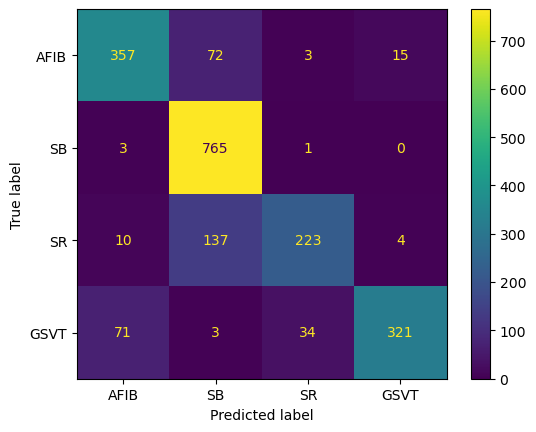

In [60]:
y_predicted =stu_0.predict(l0_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l0_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 11s 169ms/step


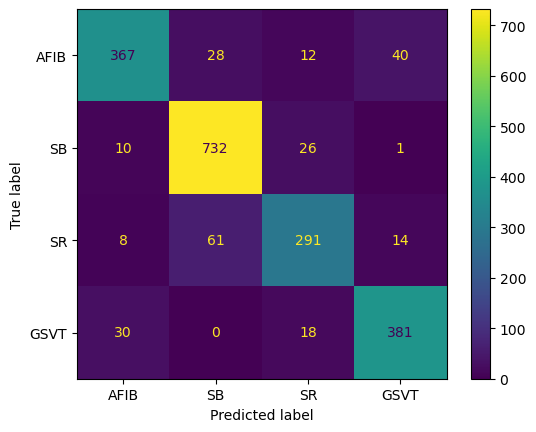

In [61]:
y_predicted =stu_1.predict(l1_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l1_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 8s 130ms/step


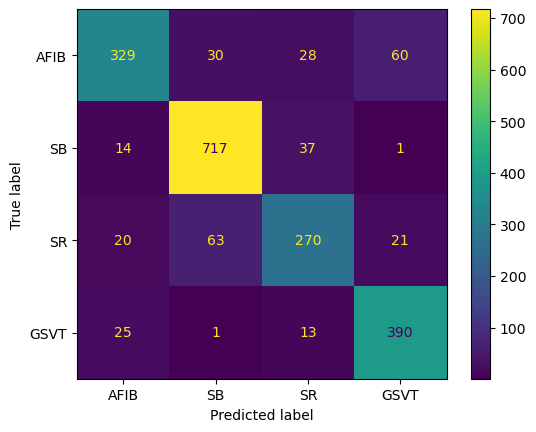

In [64]:
y_predicted =stu_2.predict(l2_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l2_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 8s 128ms/step


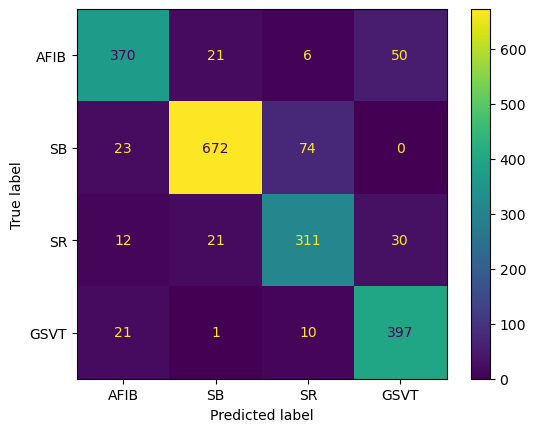

In [65]:
y_predicted =stu_3.predict(l3_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l3_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 9s 147ms/step


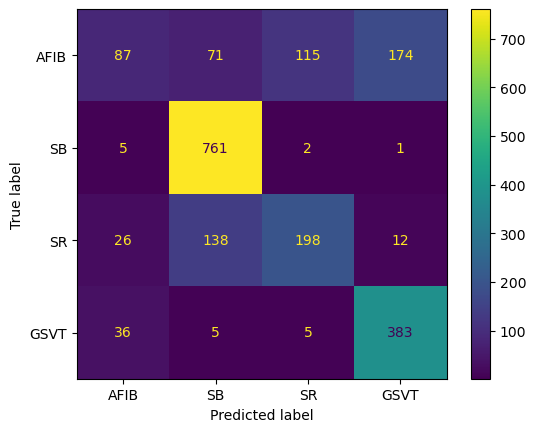

In [78]:
y_predicted =stu_4.predict(l4_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l4_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 10s 161ms/step


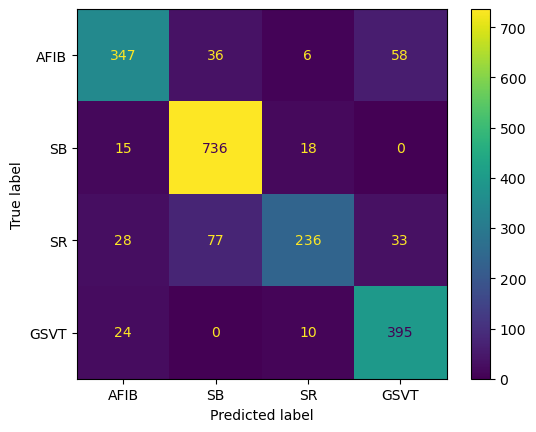

In [79]:
y_predicted =stu_5.predict(l5_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l5_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 9s 133ms/step


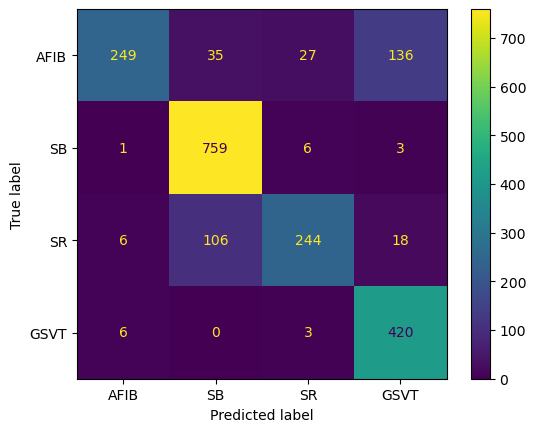

In [114]:
y_predicted =stu_6.predict(l6_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l6_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 9s 133ms/step


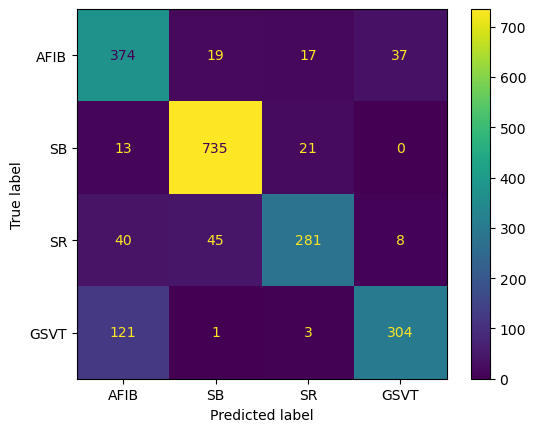

In [115]:
y_predicted =stu_7.predict(l7_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l7_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 9s 135ms/step


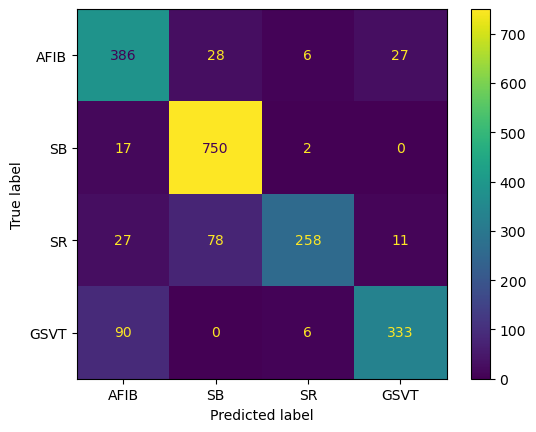

In [116]:
y_predicted =stu_8.predict(l8_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l8_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 8s 130ms/step


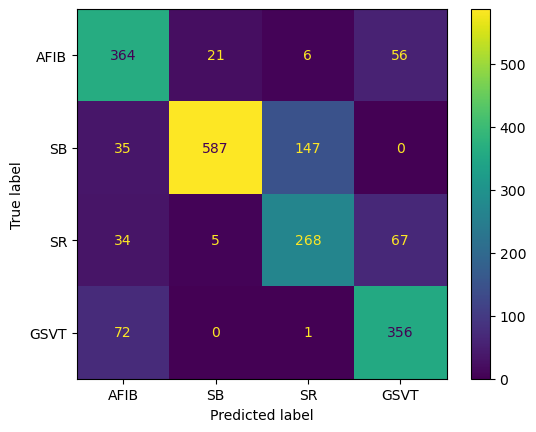

In [118]:
y_predicted =stu_9.predict(l9_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l9_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 9s 137ms/step


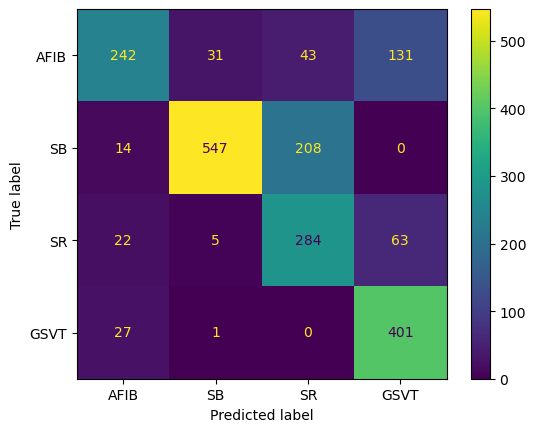

In [119]:
y_predicted =stu_10.predict(l10_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l10_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

64/64 [==============================] - 9s 139ms/step


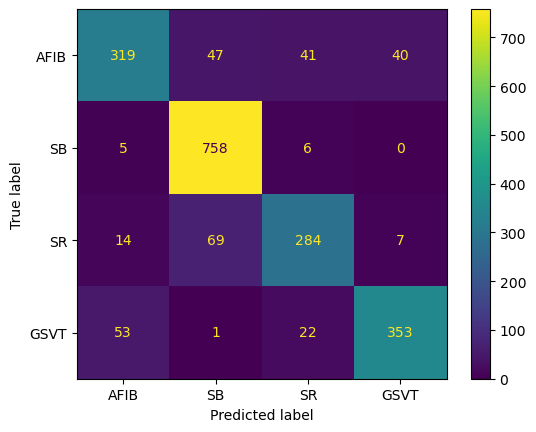

In [120]:
y_predicted =stu_11.predict(l11_x_test)
y_pred=[]
for i in y_predicted:
    idx = np.where(i==(max(i)))[0]
    y_pred.append(idx)
y_pred = np.array(y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix(l11_y_test,y_pred),display_labels=['AFIB','SB','SR','GSVT'])
disp.plot()
plt.show()

# Distillation
<font color=#FF0000>**Leads 1 to 12**</font>

In [ ]:
distiller0 = Distiller(student=stu_0, teacher=teacher_23)
distiller0.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
D_hist0 = distiller0.fit((x_train,l0_x_train),(y_train,l0_y_train), epochs=10,batch_size=16)

In [124]:
distiller1 = Distiller(student=stu_1, teacher=teacher_23)
distiller1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist1 = distiller1.fit((x_train,l1_x_train),(y_train,l1_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 291s 453ms/step - accuracy: 0.8829 - student_loss: 0.3095 - distillation_loss: 0.0194
Epoch 2/10
440/440 [==============================] - 197s 447ms/step - accuracy: 0.8873 - student_loss: 0.3006 - distillation_loss: 0.0192
Epoch 3/10
440/440 [==============================] - 189s 429ms/step - accuracy: 0.8857 - student_loss: 0.2998 - distillation_loss: 0.0188
Epoch 4/10
440/440 [==============================] - 188s 427ms/step - accuracy: 0.8957 - student_loss: 0.2794 - distillation_loss: 0.0176
Epoch 5/10
440/440 [==============================] - 186s 423ms/step - accuracy: 0.8968 - student_loss: 0.2662 - distillation_loss: 0.0167
Epoch 6/10
440/440 [==============================] - 190s 432ms/step - accuracy: 0.8988 - student_loss: 0.2657 - distillation_loss: 0.0166
Epoch 7/10
440/440 [==============================] - 195s 444ms/step - accuracy: 0.9052 - student_loss: 0.2538 - distillation_loss: 0.0157
Epoch 8/10
440/440 [

In [30]:
distiller2 = Distiller(student=stu_2, teacher=teacher_23)
distiller2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)




# Distill teacher to student
d_hist2 = distiller2.fit((x_train,l2_x_train),(y_train,l2_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 215s 473ms/step - accuracy: 0.8158 - student_loss: 0.4748 - distillation_loss: 0.0317
Epoch 2/10
440/440 [==============================] - 379s 863ms/step - accuracy: 0.8292 - student_loss: 0.4422 - distillation_loss: 0.0296
Epoch 3/10
440/440 [==============================] - 550s 1s/step - accuracy: 0.8309 - student_loss: 0.4277 - distillation_loss: 0.0287
Epoch 4/10
440/440 [==============================] - 186s 422ms/step - accuracy: 0.8469 - student_loss: 0.4033 - distillation_loss: 0.0272
Epoch 5/10
440/440 [==============================] - 205s 466ms/step - accuracy: 0.8444 - student_loss: 0.3892 - distillation_loss: 0.0265
Epoch 6/10
440/440 [==============================] - 5892s 13s/step - accuracy: 0.8540 - student_loss: 0.3784 - distillation_loss: 0.0255
Epoch 7/10
440/440 [==============================] - 203s 461ms/step - accuracy: 0.8602 - student_loss: 0.3589 - distillation_loss: 0.0242
Epoch 8/10
440/440 [====

In [31]:
distiller3 = Distiller(student=stu_3, teacher=teacher_23)
distiller3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist3 = distiller3.fit((x_train,l3_x_train),(y_train,l3_y_train), epochs=10,batch_size=16)

NameError: name 'stu_3' is not defined

In [148]:
distiller4 = Distiller(student=stu_4, teacher=teacher_23)
distiller4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist4 = distiller4.fit((x_train,l4_x_train),(y_train,l4_y_train), epochs=20,batch_size=16)

Epoch 1/20
440/440 [==============================] - 220s 436ms/step - accuracy: 0.7304 - student_loss: 0.6041 - distillation_loss: 0.0407
Epoch 2/20
440/440 [==============================] - 190s 432ms/step - accuracy: 0.7390 - student_loss: 0.5840 - distillation_loss: 0.0392
Epoch 3/20
440/440 [==============================] - 188s 427ms/step - accuracy: 0.7556 - student_loss: 0.5631 - distillation_loss: 0.0375
Epoch 4/20
440/440 [==============================] - 186s 422ms/step - accuracy: 0.7681 - student_loss: 0.5341 - distillation_loss: 0.0356
Epoch 5/20
440/440 [==============================] - 188s 428ms/step - accuracy: 0.7915 - student_loss: 0.4839 - distillation_loss: 0.0316
Epoch 6/20
440/440 [==============================] - 189s 428ms/step - accuracy: 0.8128 - student_loss: 0.4509 - distillation_loss: 0.0293
Epoch 7/20
440/440 [==============================] - 190s 433ms/step - accuracy: 0.8247 - student_loss: 0.4254 - distillation_loss: 0.0276
Epoch 8/20
440/440 [

In [24]:
distiller5 = Distiller(student=stu_5, teacher=teacher_23)
distiller5.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist5 = distiller5.fit((x_train,l5_x_train),(y_train,l5_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 173s 374ms/step - accuracy: 0.8580 - student_loss: 0.3704 - distillation_loss: 0.0248
Epoch 2/10
440/440 [==============================] - 164s 372ms/step - accuracy: 0.8628 - student_loss: 0.3583 - distillation_loss: 0.0240
Epoch 3/10
440/440 [==============================] - 163s 371ms/step - accuracy: 0.8746 - student_loss: 0.3359 - distillation_loss: 0.0224
Epoch 4/10
440/440 [==============================] - 253s 574ms/step - accuracy: 0.8743 - student_loss: 0.3223 - distillation_loss: 0.0217
Epoch 5/10
440/440 [==============================] - 165s 374ms/step - accuracy: 0.8759 - student_loss: 0.3201 - distillation_loss: 0.0217
Epoch 6/10
440/440 [==============================] - 158s 359ms/step - accuracy: 0.8864 - student_loss: 0.3036 - distillation_loss: 0.0205
Epoch 7/10
440/440 [==============================] - 157s 358ms/step - accuracy: 0.8928 - student_loss: 0.2883 - distillation_loss: 0.0193
Epoch 8/10
440/440 [

In [22]:
distiller6 = Distiller(student=stu_6, teacher=teacher_23)
distiller6.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist6 = distiller6.fit((x_train,l6_x_train),(y_train,l6_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 169s 370ms/step - accuracy: 0.5125 - student_loss: 1.0857 - distillation_loss: 0.0705
Epoch 2/10
440/440 [==============================] - 155s 353ms/step - accuracy: 0.6284 - student_loss: 0.8493 - distillation_loss: 0.0559
Epoch 3/10
440/440 [==============================] - 158s 360ms/step - accuracy: 0.6950 - student_loss: 0.7438 - distillation_loss: 0.0485
Epoch 4/10
440/440 [==============================] - 157s 356ms/step - accuracy: 0.7482 - student_loss: 0.6260 - distillation_loss: 0.0405
Epoch 5/10
440/440 [==============================] - 155s 353ms/step - accuracy: 0.7980 - student_loss: 0.5344 - distillation_loss: 0.0338
Epoch 6/10
440/440 [==============================] - 155s 353ms/step - accuracy: 0.8133 - student_loss: 0.4949 - distillation_loss: 0.0312
Epoch 7/10
440/440 [==============================] - 157s 357ms/step - accuracy: 0.8369 - student_loss: 0.4202 - distillation_loss: 0.0262
Epoch 8/10
440/440 [

In [23]:
distiller7 = Distiller(student=stu_7, teacher=teacher_23)
distiller7.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist7 = distiller7.fit((x_train,l7_x_train),(y_train,l7_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 257s 424ms/step - accuracy: 0.5821 - student_loss: 0.9728 - distillation_loss: 0.0633
Epoch 2/10
440/440 [==============================] - 164s 372ms/step - accuracy: 0.6587 - student_loss: 0.7814 - distillation_loss: 0.0514
Epoch 3/10
440/440 [==============================] - 167s 379ms/step - accuracy: 0.7022 - student_loss: 0.7136 - distillation_loss: 0.0469
Epoch 4/10
440/440 [==============================] - 163s 370ms/step - accuracy: 0.7373 - student_loss: 0.6243 - distillation_loss: 0.0403
Epoch 5/10
440/440 [==============================] - 162s 369ms/step - accuracy: 0.7438 - student_loss: 0.6103 - distillation_loss: 0.0397
Epoch 6/10
440/440 [==============================] - 159s 361ms/step - accuracy: 0.7795 - student_loss: 0.5505 - distillation_loss: 0.0351
Epoch 7/10
440/440 [==============================] - 159s 361ms/step - accuracy: 0.7986 - student_loss: 0.4953 - distillation_loss: 0.0315
Epoch 8/10
440/440 [

In [24]:
distiller8 = Distiller(student=stu_8, teacher=teacher_23)
distiller8.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist8 = distiller8.fit((x_train,l8_x_train),(y_train,l8_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 173s 363ms/step - accuracy: 0.5233 - student_loss: 1.0644 - distillation_loss: 0.0693
Epoch 2/10
440/440 [==============================] - 176s 400ms/step - accuracy: 0.6798 - student_loss: 0.7611 - distillation_loss: 0.0500
Epoch 3/10
440/440 [==============================] - 170s 386ms/step - accuracy: 0.7254 - student_loss: 0.6607 - distillation_loss: 0.0432
Epoch 4/10
440/440 [==============================] - 157s 358ms/step - accuracy: 0.7514 - student_loss: 0.6078 - distillation_loss: 0.0390
Epoch 5/10
440/440 [==============================] - 158s 358ms/step - accuracy: 0.7714 - student_loss: 0.5534 - distillation_loss: 0.0352
Epoch 6/10
440/440 [==============================] - 156s 356ms/step - accuracy: 0.7965 - student_loss: 0.5150 - distillation_loss: 0.0320
Epoch 7/10
440/440 [==============================] - 156s 355ms/step - accuracy: 0.8144 - student_loss: 0.4581 - distillation_loss: 0.0282
Epoch 8/10
440/440 [

In [25]:
distiller9 = Distiller(student=stu_9, teacher=teacher_23)
distiller9.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist9 = distiller9.fit((x_train,l9_x_train),(y_train,l9_y_train), epochs=20,batch_size=16)

Epoch 1/20
440/440 [==============================] - 167s 352ms/step - accuracy: 0.5362 - student_loss: 1.0345 - distillation_loss: 0.0673
Epoch 2/20
440/440 [==============================] - 158s 358ms/step - accuracy: 0.6852 - student_loss: 0.7554 - distillation_loss: 0.0493
Epoch 3/20
440/440 [==============================] - 157s 356ms/step - accuracy: 0.7245 - student_loss: 0.6761 - distillation_loss: 0.0435
Epoch 4/20
440/440 [==============================] - 156s 354ms/step - accuracy: 0.7365 - student_loss: 0.6470 - distillation_loss: 0.0419
Epoch 5/20
440/440 [==============================] - 157s 356ms/step - accuracy: 0.7560 - student_loss: 0.5940 - distillation_loss: 0.0382
Epoch 6/20
440/440 [==============================] - 157s 357ms/step - accuracy: 0.7755 - student_loss: 0.5546 - distillation_loss: 0.0357
Epoch 7/20
440/440 [==============================] - 156s 355ms/step - accuracy: 0.7821 - student_loss: 0.5330 - distillation_loss: 0.0340
Epoch 8/20
440/440 [

In [39]:
distiller10 = Distiller(student=stu_10, teacher=teacher_23)
distiller10.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist10 = distiller10.fit((x_train,l10_x_train),(y_train,l10_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 166s 368ms/step - accuracy: 0.5666 - student_loss: 0.9940 - distillation_loss: 0.0646
Epoch 2/10
440/440 [==============================] - 157s 356ms/step - accuracy: 0.6990 - student_loss: 0.7291 - distillation_loss: 0.0476
Epoch 3/10
440/440 [==============================] - 155s 352ms/step - accuracy: 0.7159 - student_loss: 0.6813 - distillation_loss: 0.0446
Epoch 4/10
440/440 [==============================] - 157s 357ms/step - accuracy: 0.7398 - student_loss: 0.6284 - distillation_loss: 0.0411
Epoch 5/10
440/440 [==============================] - 156s 354ms/step - accuracy: 0.7582 - student_loss: 0.5786 - distillation_loss: 0.0380
Epoch 6/10
440/440 [==============================] - 157s 357ms/step - accuracy: 0.7807 - student_loss: 0.5538 - distillation_loss: 0.0352
Epoch 7/10
440/440 [==============================] - 162s 368ms/step - accuracy: 0.8118 - student_loss: 0.4720 - distillation_loss: 0.0295
Epoch 8/10
440/440 [

In [40]:
distiller11 = Distiller(student=stu_11, teacher=teacher_23)
distiller11.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
d_hist11 = distiller11.fit((x_train,l11_x_train),(y_train,l11_y_train), epochs=10,batch_size=16)

Epoch 1/10
440/440 [==============================] - 219s 350ms/step - accuracy: 0.5204 - student_loss: 1.0800 - distillation_loss: 0.0699
Epoch 2/10
440/440 [==============================] - 157s 357ms/step - accuracy: 0.6725 - student_loss: 0.7822 - distillation_loss: 0.0512
Epoch 3/10
440/440 [==============================] - 157s 356ms/step - accuracy: 0.7236 - student_loss: 0.6830 - distillation_loss: 0.0441
Epoch 4/10
440/440 [==============================] - 156s 355ms/step - accuracy: 0.7319 - student_loss: 0.6427 - distillation_loss: 0.0424
Epoch 5/10
440/440 [==============================] - 157s 357ms/step - accuracy: 0.7562 - student_loss: 0.5882 - distillation_loss: 0.0382
Epoch 6/10
440/440 [==============================] - 157s 357ms/step - accuracy: 0.7942 - student_loss: 0.5251 - distillation_loss: 0.0331
Epoch 7/10
440/440 [==============================] - 157s 358ms/step - accuracy: 0.8266 - student_loss: 0.4450 - distillation_loss: 0.0271
Epoch 8/10
440/440 [


# Distillation Accuracy

In [47]:
distiller0.evaluate((x_test,l0_x_test), (y_test,l0_y_test))

NameError: name 'distiller0' is not defined

In [132]:
distiller1.evaluate((x_test,l1_x_test), (y_test,l1_y_test))

64/64 [==============================] - 28s 236ms/step - accuracy: 0.8574 - student_loss: 0.4250


[0.8573551177978516, 1.7230859994888306]

In [32]:
distiller2.evaluate((x_test,l2_x_test), (y_test,l2_y_test))

64/64 [==============================] - 12s 174ms/step - accuracy: 0.8618 - student_loss: 0.3702


[0.8618127703666687, 0.7756836414337158]

In [134]:
distiller3.evaluate((x_test,l3_x_test), (y_test,l3_y_test))

64/64 [==============================] - 21s 201ms/step - accuracy: 0.9049 - student_loss: 0.2694


[0.9049034118652344, 0.9567267894744873]

In [149]:
distiller4.evaluate((x_test,l4_x_test), (y_test,l4_y_test))

64/64 [==============================] - 30s 213ms/step - accuracy: 0.8474 - student_loss: 0.4064


[0.8474492430686951, 0.6029248833656311]

In [27]:
distiller5.evaluate((x_test,l5_x_test), (y_test,l5_y_test))

64/64 [==============================] - 12s 183ms/step - accuracy: 0.8375 - student_loss: 0.5241


[0.8375433087348938, 1.6249204874038696]

In [27]:
distiller6.evaluate((x_test,l6_x_test), (y_test,l6_y_test))

64/64 [==============================] - 14s 146ms/step - accuracy: 0.8544 - student_loss: 0.3509


[0.8543833494186401, 0.5997300148010254]

In [28]:
distiller7.evaluate((x_test,l7_x_test), (y_test,l7_y_test))

64/64 [==============================] - 14s 162ms/step - accuracy: 0.8361 - student_loss: 0.4204


[0.8360574245452881, 0.851611316204071]

In [29]:
distiller8.evaluate((x_test,l8_x_test), (y_test,l8_y_test))

64/64 [==============================] - 12s 151ms/step - accuracy: 0.8663 - student_loss: 0.3277


[0.8662704229354858, 0.7053562998771667]

In [30]:
distiller9.evaluate((x_test,l9_x_test), (y_test,l9_y_test))

64/64 [==============================] - 10s 149ms/step - accuracy: 0.8846 - student_loss: 0.3020


[0.8845963478088379, 0.6538432240486145]

In [41]:
distiller10.evaluate((x_test,l10_x_test), (y_test,l10_y_test))

64/64 [==============================] - 11s 149ms/step - accuracy: 0.8375 - student_loss: 0.3886


[0.8375433087348938, 0.6959314346313477]

In [42]:
distiller11.evaluate((x_test,l11_x_test), (y_test,l11_y_test))

64/64 [==============================] - 11s 156ms/step - accuracy: 0.8118 - student_loss: 0.4381


[0.811788022518158, 0.647156298160553]

# Graph
<font color=#FF0000>**Accuracy**</font>

Text(0, 0.5, 'Accuracy')

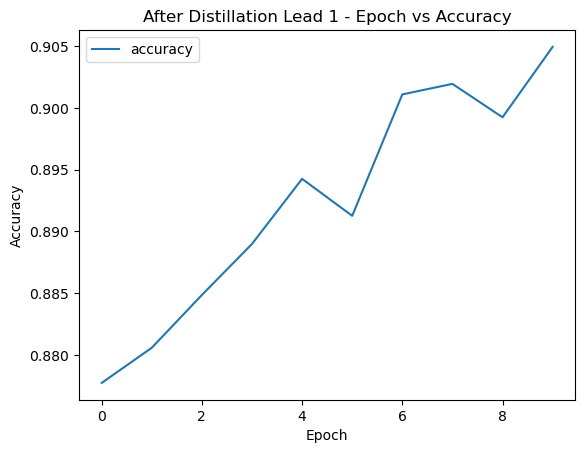

In [137]:
plt.plot(D_hist0.history['accuracy'])
# plt.plot(D_hist0.history['val_accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead 1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

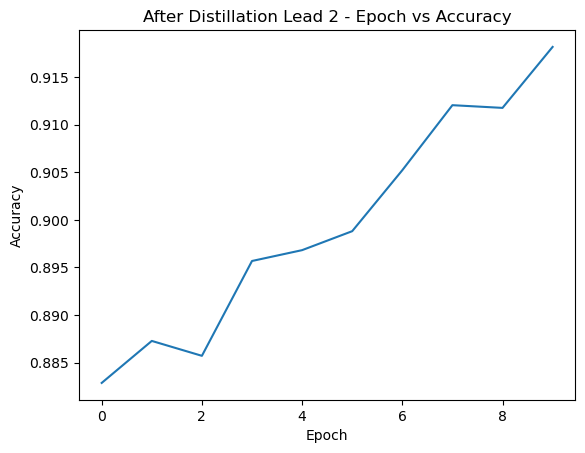

In [138]:
plt.plot(d_hist1.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead 2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

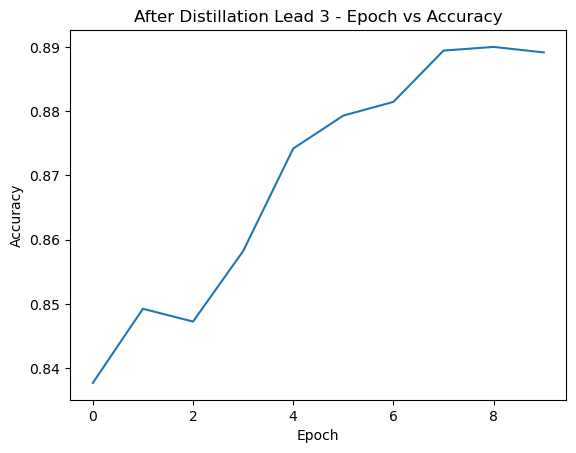

In [139]:
plt.plot(d_hist2.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead 3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

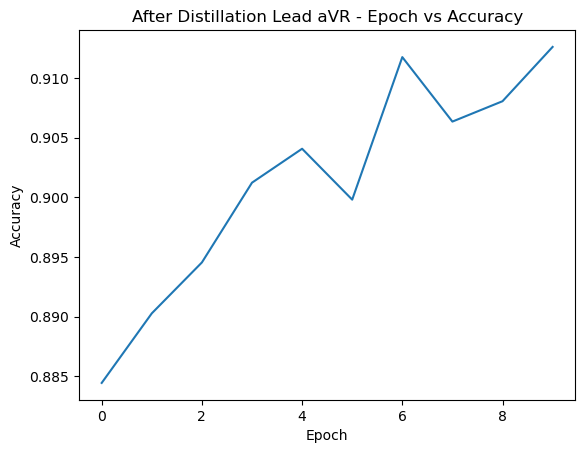

In [140]:
plt.plot(d_hist3.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead aVR - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

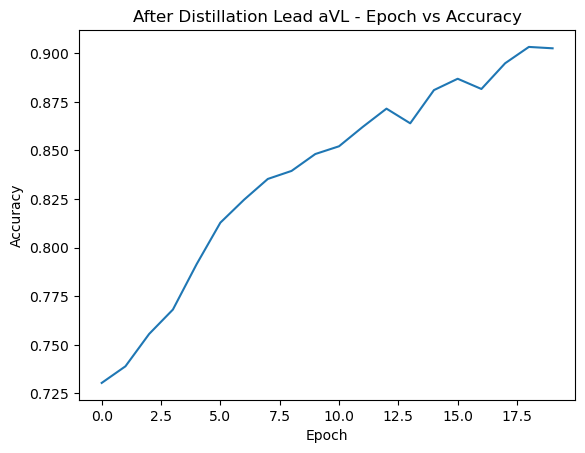

In [154]:
plt.plot(d_hist4.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead aVL - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
plt.plot(d_hist5.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead aVF - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

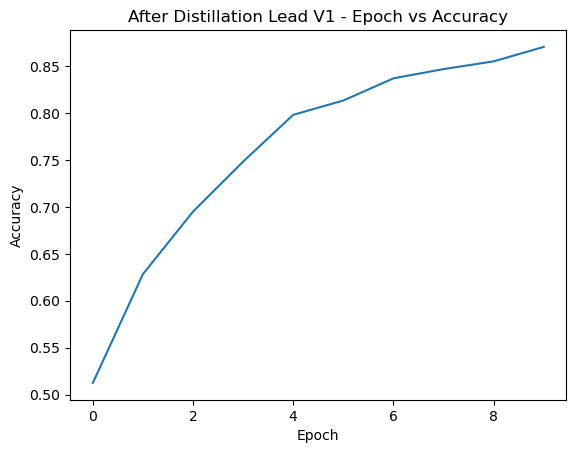

In [31]:
plt.plot(d_hist6.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V1 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

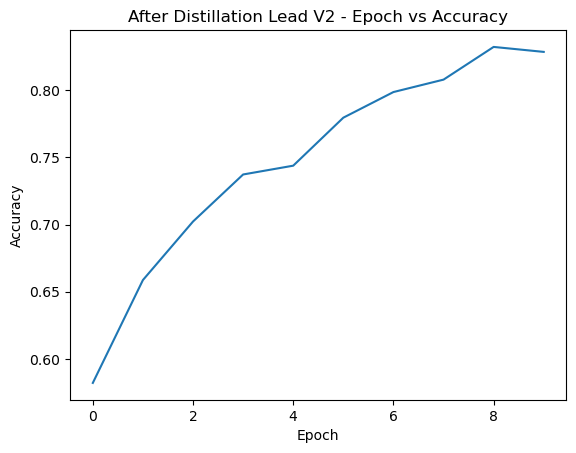

In [32]:
plt.plot(d_hist7.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V2 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

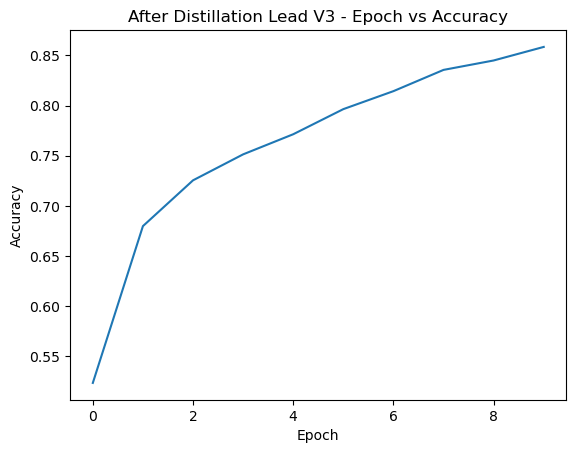

In [33]:
plt.plot(d_hist8.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V3 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

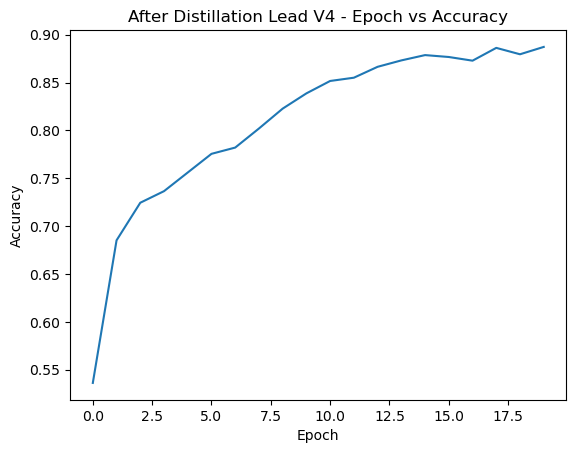

In [34]:
plt.plot(d_hist9.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V4 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

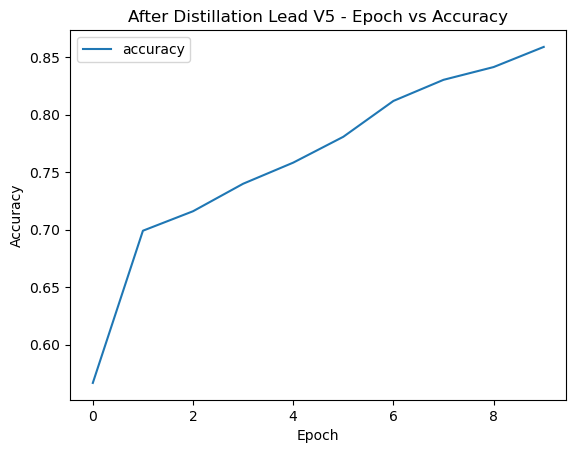

In [43]:
plt.plot(d_hist10.history['accuracy'])
plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V5 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

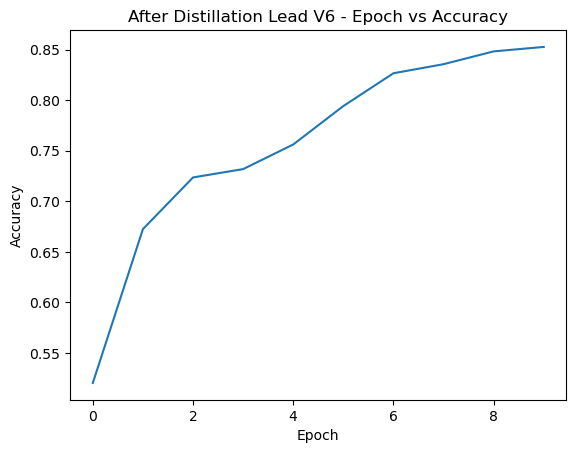

In [44]:
plt.plot(d_hist11.history['accuracy'])
# plt.legend(["accuracy","Test_accuracy"])
plt.title('After Distillation Lead V6 - Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<font color=#FF0000>**Loss**</font>

Text(0, 0.5, 'Loss')

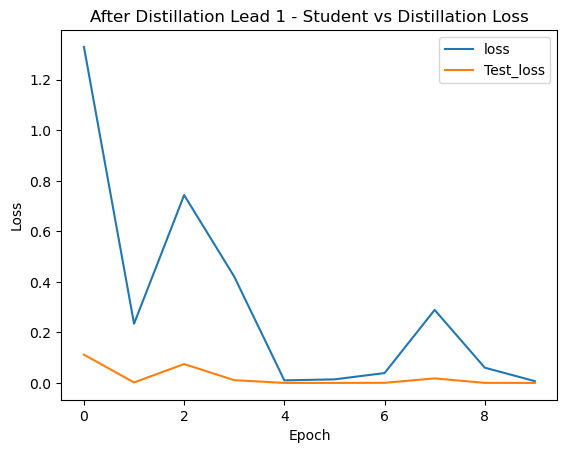

In [141]:
plt.plot(D_hist0.history['student_loss'])
plt.plot(D_hist0.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead 1 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

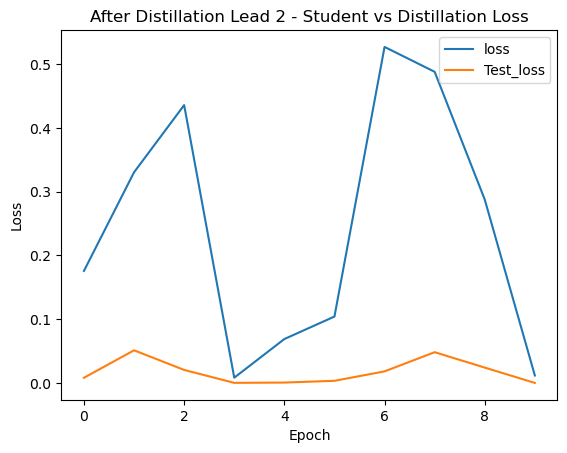

In [142]:
plt.plot(d_hist1.history['student_loss'])
plt.plot(d_hist1.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead 2 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

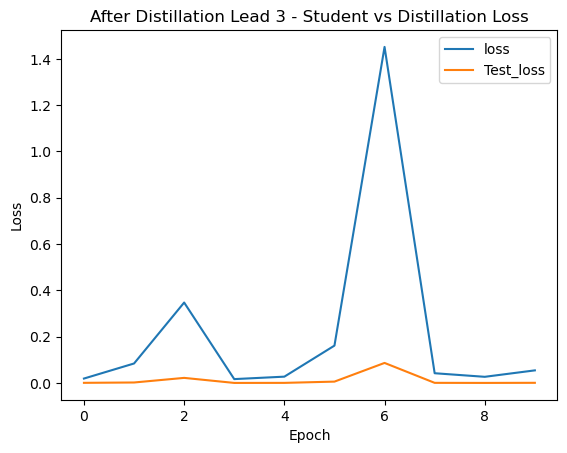

In [143]:
plt.plot(d_hist2.history['student_loss'])
plt.plot(d_hist2.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead 3 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

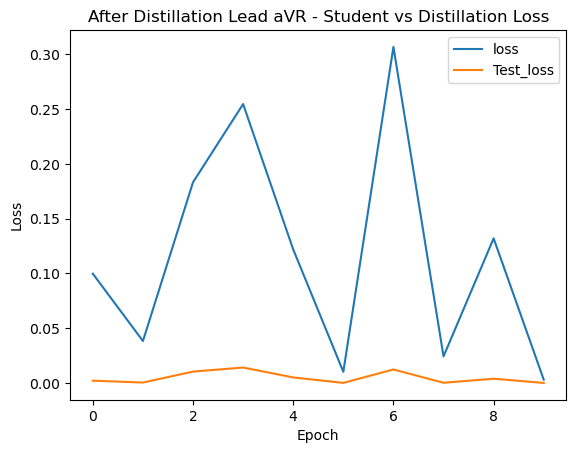

In [144]:
plt.plot(d_hist3.history['student_loss'])
plt.plot(d_hist3.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead aVR - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

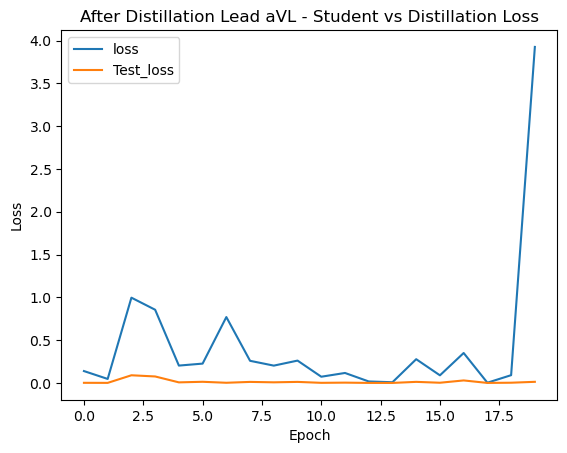

In [152]:
plt.plot(d_hist4.history['student_loss'])
plt.plot(d_hist4.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead aVL - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
plt.plot(d_hist5.history['student_loss'])
plt.plot(d_hist5.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead aVF - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

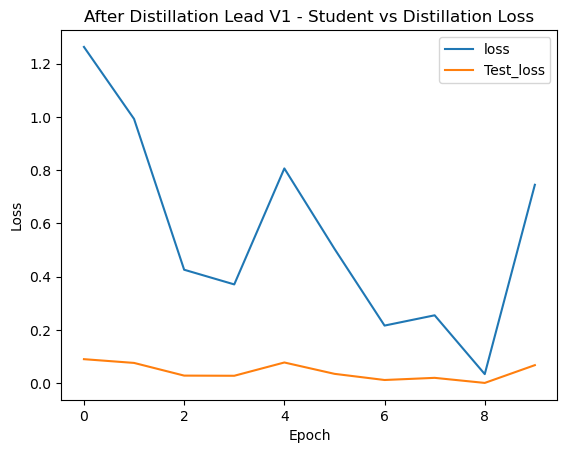

In [35]:
plt.plot(d_hist6.history['student_loss'])
plt.plot(d_hist6.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V1 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

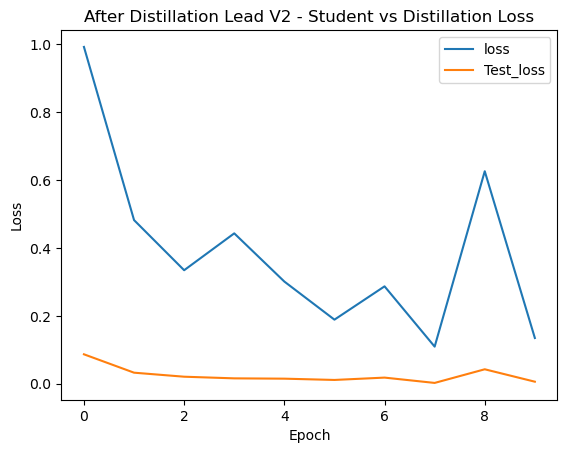

In [36]:
plt.plot(d_hist7.history['student_loss'])
plt.plot(d_hist7.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V2 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

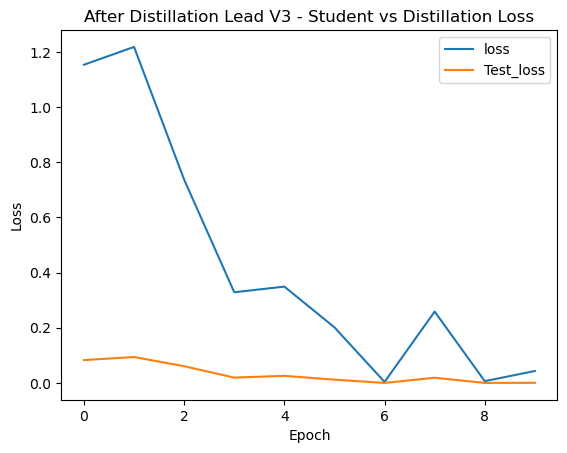

In [37]:
plt.plot(d_hist8.history['student_loss'])
plt.plot(d_hist8.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V3 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

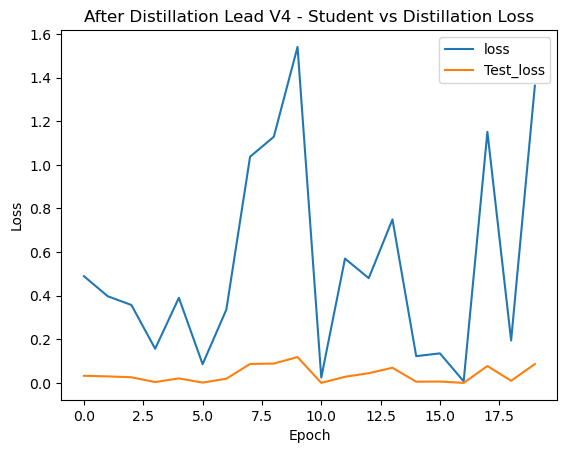

In [38]:
plt.plot(d_hist9.history['student_loss'])
plt.plot(d_hist9.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V4 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

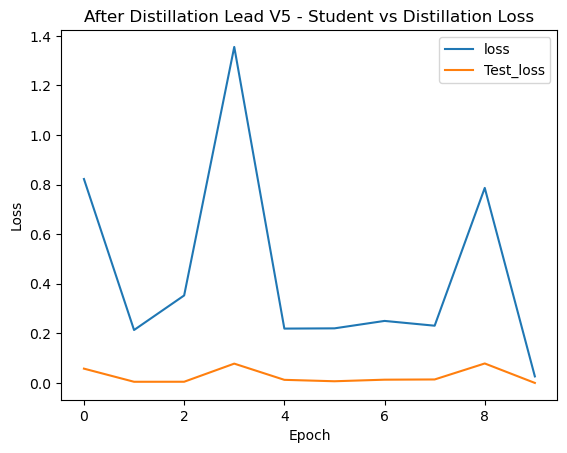

In [45]:
plt.plot(d_hist10.history['student_loss'])
plt.plot(d_hist10.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V5 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

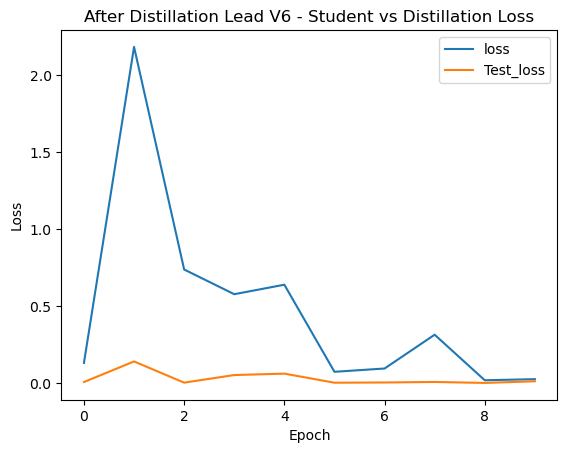

In [46]:
plt.plot(d_hist11.history['student_loss'])
plt.plot(d_hist11.history['distillation_loss'])
plt.legend(["loss","Test_loss"])
plt.title('After Distillation Lead V6 - Student vs Distillation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')